In [1]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px
import plotly.graph_objects as go

from datetime import date, timedelta

import plotly.offline as py

import folium 
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

# Covid19 관련 폴더 내 CSV읽기
* 출처1 : Dacon 코로나 시각화 대회 데이터
* 출처2 : https://ourworldindata.org/coronavirus/country/south-korea

In [4]:
import os
files = os.listdir('/content/drive/MyDrive/covid')
files

['SeoulFloating.csv',
 'Region.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv',
 'SearchTrend.csv',
 'Case.csv',
 'PatientRoute.csv',
 'Policy.csv',
 'PatientInfo.csv',
 'covid.csv',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 'Covid_Modeling.ipynb',
 'Untitled3.ipynb',
 'Overseas Inflow.ipynb',
 'EDA.ipynb']

# 출처1 데이터

In [5]:
for file in files:
    if file.endswith('.csv'):
        globals()[file.split('.')[0]] = pd.read_csv(f'/content/drive/MyDrive/covid/{file}')

In [6]:
SeoulFloating.head()

date  hour  birth_year     sex province           city  fp_num
0  2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1  2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2  2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3  2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4  2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

In [7]:
PatientRoute.head()

patient_id  global_num        date     province          city  \
0  1000000001         2.0  2020-01-22  Gyeonggi-do      Gimpo-si   
1  1000000001         2.0  2020-01-24        Seoul       Jung-gu   
2  1000000002         5.0  2020-01-25        Seoul   Seongbuk-gu   
3  1000000002         5.0  2020-01-26        Seoul   Seongbuk-gu   
4  1000000002         5.0  2020-01-26        Seoul  Seongdong-gu   

                    type   latitude   longitude  
0                airport  37.615246  126.715632  
1               hospital  37.567241  127.005659  
2                    etc  37.592560  127.017048  
3                  store  37.591810  127.016822  
4  public_transportation  37.563992  127.029534

In [8]:
PatientInfo.head()

patient_id  global_num     sex  birth_year  age country province  \
0  1000000001         2.0    male      1964.0  50s   Korea    Seoul   
1  1000000002         5.0    male      1987.0  30s   Korea    Seoul   
2  1000000003         6.0    male      1964.0  50s   Korea    Seoul   
3  1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4  1000000005         9.0  female      1992.0  20s   Korea    Seoul   

          city disease        infection_case  infection_order   infected_by  \
0   Gangseo-gu     NaN       overseas inflow              1.0           NaN   
1  Jungnang-gu     NaN       overseas inflow              1.0           NaN   
2    Jongno-gu     NaN  contact with patient              2.0  2.002000e+09   
3      Mapo-gu     NaN       overseas inflow              1.0           NaN   
4  Seongbuk-gu     NaN  contact with patient              2.0  1.000000e+09   

   contact_number symptom_onset_date confirmed_date released_date  \
0            75.0         2020-01-22     2020-01-23    2020-02-05   
1            31.0                NaN     2020-01-30    2020-03-02   
2            17.0                NaN     2020-01-30    2020-02-19   
3             9.0         2020-01-26     2020-01-30    2020-02-15   
4             2.0                NaN     2020-01-31    2020-02-24   

  deceased_date     state  
0           NaN  released  
1           NaN  released  
2           NaN  released  
3           NaN  released  
4           NaN  released

In [9]:
TimeGender.head()

date  time     sex  confirmed  deceased
0  2020-03-02     0    male       1591        13
1  2020-03-02     0  female       2621         9
2  2020-03-03     0    male       1810        16
3  2020-03-03     0  female       3002        12
4  2020-03-04     0    male       1996        20

In [10]:
TimeProvince.head()

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

In [11]:
Time.head()

date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0

In [12]:
SearchTrend.head()

date     cold      flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.05590    0.15726      0.00736
1  2016-01-02  0.13372  0.17135    0.20826      0.00890
2  2016-01-03  0.14917  0.22317    0.19326      0.00845
3  2016-01-04  0.17463  0.18626    0.29008      0.01145
4  2016-01-05  0.17226  0.15072    0.24562      0.01381

In [13]:
TimeAge.head()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

In [14]:
Region.head()

code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080

In [15]:
Policy.head()

policy_id country         type                      gov_policy  \
0          1   Korea        Alert  Infectious Disease Alert Level   
1          2   Korea        Alert  Infectious Disease Alert Level   
2          3   Korea        Alert  Infectious Disease Alert Level   
3          4   Korea        Alert  Infectious Disease Alert Level   
4          5   Korea  Immigration   Special Immigration Procedure   

             detail  start_date    end_date  
0    Level 1 (Blue)  2020-01-03  2020-01-19  
1  Level 2 (Yellow)  2020-01-20  2020-01-27  
2  Level 3 (Orange)  2020-01-28  2020-02-22  
3     Level 4 (Red)  2020-02-23         NaN  
4        from China  2020-02-04         NaN

In [16]:
Weather.head()

code province        date  avg_temp  min_temp  max_temp  precipitation  \
0  10000    Seoul  2016-01-01       1.2      -3.3       4.0            0.0   
1  11000    Busan  2016-01-01       5.3       1.1      10.9            0.0   
2  12000    Daegu  2016-01-01       1.7      -4.0       8.0            0.0   
3  13000  Gwangju  2016-01-01       3.2      -1.5       8.1            0.0   
4  14000  Incheon  2016-01-01       3.1      -0.4       5.7            0.0   

   max_wind_speed  most_wind_direction  avg_relative_humidity  
0             3.5                 90.0                   73.0  
1             7.4                340.0                   52.1  
2             3.7                270.0                   70.5  
3             2.7                230.0                   73.1  
4             5.3                180.0                   83.9

In [17]:
Case.head()

case_id province           city  group                 infection_case  \
0  1000001    Seoul        Guro-gu   True            Guro-gu Call Center   
1  1000002    Seoul  Dongdaemun-gu   True                  Dongan Church   
2  1000003    Seoul        Guro-gu   True          Manmin Central Church   
3  1000004    Seoul   Eunpyeong-gu   True  Eunpyeong St. Mary's Hospital   
4  1000005    Seoul   Seongdong-gu   True               Seongdong-gu APT   

   confirmed   latitude   longitude  
0         98  37.508163  126.884387  
1         20  37.592888  127.056766  
2         41  37.481059  126.894343  
3         14   37.63369    126.9165  
4         13   37.55713    127.0403

# PatientInfo 분석

*   출처1의 데이터는 2020년 4월까지 데이터로 구성
*   출처2의 데이터는 2022년 5월까지 데이터로 구성



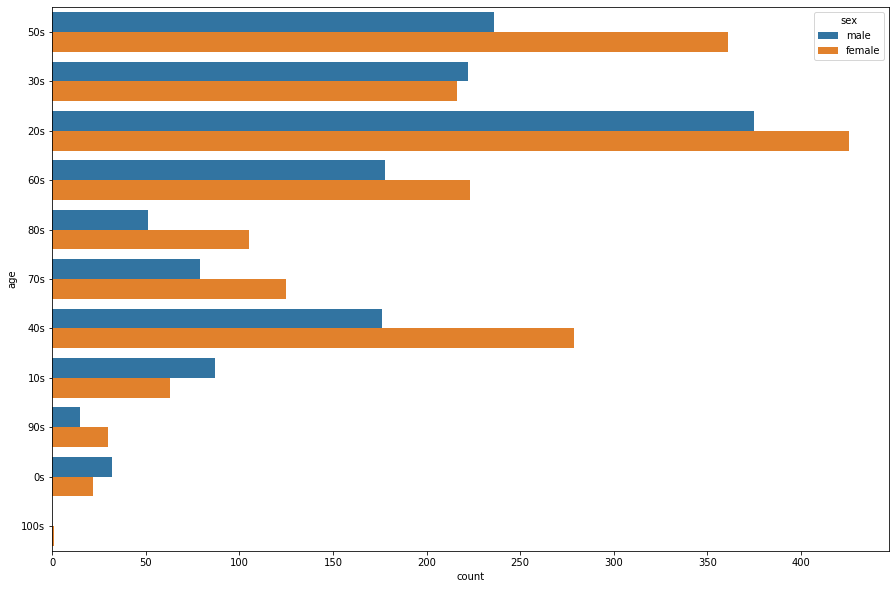

In [18]:
# 연령대 및 성별 확진자
plt.figure(figsize=(15,10))
sns.countplot(data=PatientInfo, y='age', hue='sex')

* 전체적으로 20대가 확진자의 비율이 높음
* 전체적으로 여성 확진자의 비율이 높음 

In [19]:
age_20s = PatientInfo[PatientInfo['age']=='20s']
age_20s.head()

patient_id  global_num     sex  birth_year  age country province  \
3   1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4   1000000005         9.0  female      1992.0  20s   Korea    Seoul   
6   1000000007        11.0    male      1995.0  20s   Korea    Seoul   
7   1000000008        13.0    male      1992.0  20s   Korea    Seoul   
11  1000000012        24.0    male      1992.0  20s   Korea    Seoul   

           city disease        infection_case  infection_order   infected_by  \
3       Mapo-gu     NaN       overseas inflow              1.0           NaN   
4   Seongbuk-gu     NaN  contact with patient              2.0  1.000000e+09   
6     Jongno-gu     NaN  contact with patient              3.0  1.000000e+09   
7           etc     NaN       overseas inflow              1.0           NaN   
11          etc     NaN       overseas inflow              1.0           NaN   

    contact_number symptom_onset_date confirmed_date released_date  \
3              9.0         2020-01-26     2020-01-30    2020-02-15   
4              2.0                NaN     2020-01-31    2020-02-24   
6              0.0                NaN     2020-01-31    2020-02-10   
7              0.0                NaN     2020-02-02    2020-02-24   
11             0.0                NaN     2020-02-07    2020-02-27   

   deceased_date     state  
3            NaN  released  
4            NaN  released  
6            NaN  released  
7            NaN  released  
11           NaN  released

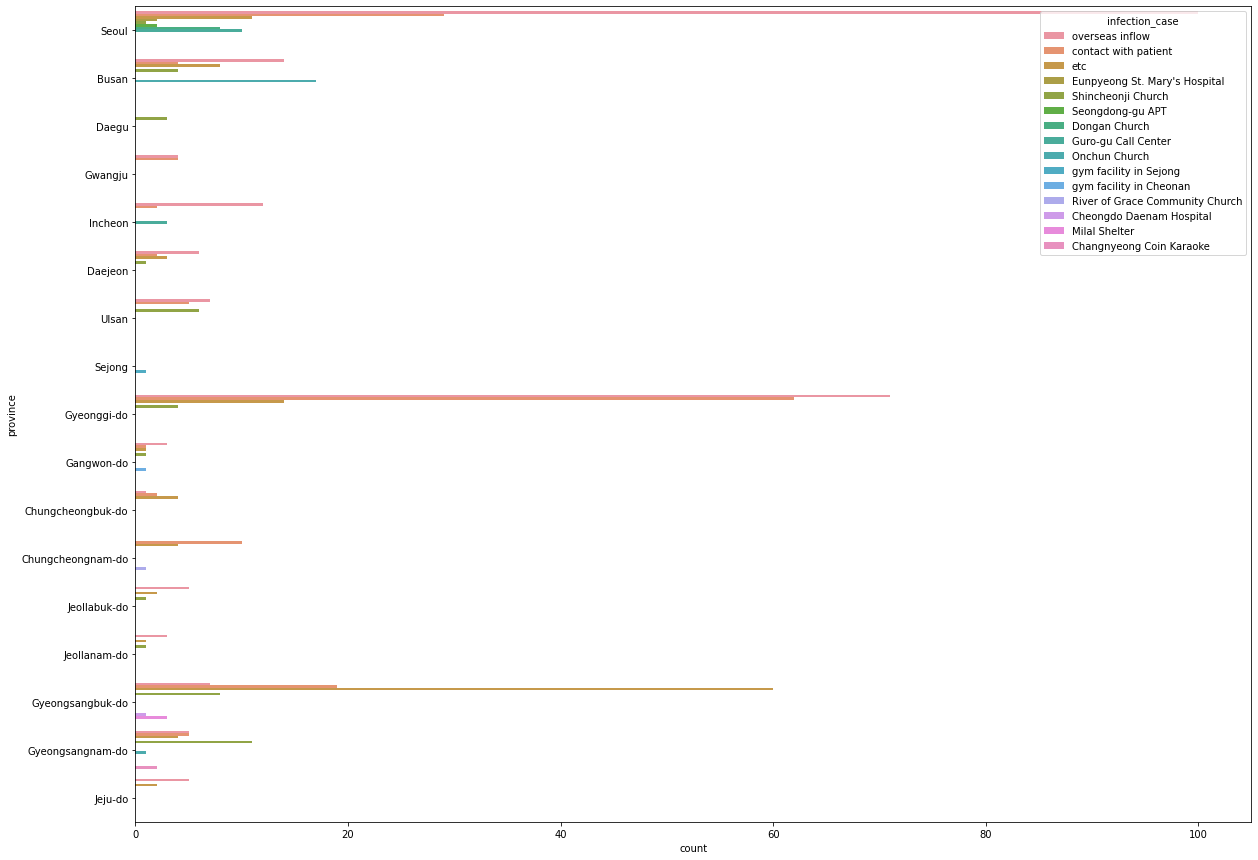

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(data=age_20s, y='province', hue='infection_case')

* 20대의 주 확진 지역은 서울, 경기도, 경상북도 3개의 지역에서 주로 확진이 발생한 것을 볼 수 있음

In [21]:
age_20_seoul = age_20s['province']=='Seoul'
age_20_gyeonggi_do = age_20s['province']=='Gyeonggi-do'
age_20_gyeonsangbuk_do = age_20s['province']=='Gyeongsangbuk-do'

age_20_3top = age_20s[age_20_seoul|age_20_gyeonggi_do|age_20_gyeonsangbuk_do]
age_20_3top

patient_id  global_num     sex  birth_year  age country  \
3     1000000004         7.0    male      1991.0  20s   Korea   
4     1000000005         9.0  female      1992.0  20s   Korea   
6     1000000007        11.0    male      1995.0  20s   Korea   
7     1000000008        13.0    male      1992.0  20s   Korea   
11    1000000012        24.0    male      1992.0  20s   Korea   
...          ...         ...     ...         ...  ...     ...   
3244  6023000038         NaN  female         NaN  20s   Korea   
3245  6023000039         NaN    male         NaN  20s   Korea   
3249  6023000043         NaN  female         NaN  20s   Korea   
3257  6023000051         NaN    male         NaN  20s   Korea   
3258  6023000052         NaN    male         NaN  20s   Korea   

              province         city disease        infection_case  \
3                Seoul      Mapo-gu     NaN       overseas inflow   
4                Seoul  Seongbuk-gu     NaN  contact with patient   
6                Seoul    Jongno-gu     NaN  contact with patient   
7                Seoul          etc     NaN       overseas inflow   
11               Seoul          etc     NaN       overseas inflow   
...                ...          ...     ...                   ...   
3244  Gyeongsangbuk-do    Pohang-si     NaN  contact with patient   
3245  Gyeongsangbuk-do    Pohang-si     NaN  contact with patient   
3249  Gyeongsangbuk-do    Pohang-si     NaN                   NaN   
3257  Gyeongsangbuk-do    Pohang-si     NaN                   NaN   
3258  Gyeongsangbuk-do    Pohang-si     NaN                   NaN   

      infection_order   infected_by  contact_number symptom_onset_date  \
3                 1.0           NaN             9.0         2020-01-26   
4                 2.0  1.000000e+09             2.0                NaN   
6                 3.0  1.000000e+09             0.0                NaN   
7                 1.0           NaN             0.0                NaN   
11                1.0           NaN             0.0                NaN   
...               ...           ...             ...                ...   
3244              NaN  6.023000e+09             NaN                NaN   
3245              NaN           NaN             NaN                NaN   
3249              NaN           NaN             NaN                NaN   
3257              NaN           NaN             NaN                NaN   
3258              NaN           NaN             NaN                NaN   

     confirmed_date released_date deceased_date     state  
3        2020-01-30    2020-02-15           NaN  released  
4        2020-01-31    2020-02-24           NaN  released  
6        2020-01-31    2020-02-10           NaN  released  
7        2020-02-02    2020-02-24           NaN  released  
11       2020-02-07    2020-02-27           NaN  released  
...             ...           ...           ...       ...  
3244     2020-03-06    2020-03-31           NaN  released  
3245     2020-03-06           NaN           NaN  released  
3249     2020-03-07           NaN           NaN  isolated  
3257     2020-03-26           NaN           NaN  isolated  
3258     2020-04-04           NaN           NaN  isolated  

[614 rows x 18 columns]

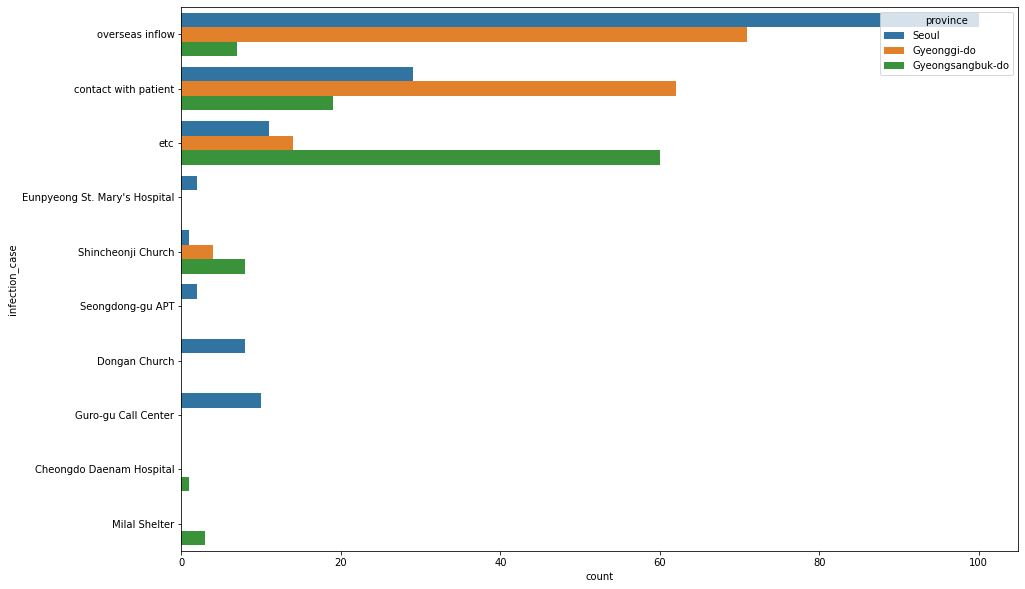

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=age_20_3top, y='infection_case',hue='province')

* 서울은 해외유입, 확진자 접촉, etc에서 주로 확진되었음
* 경기도는 해외유입, 확진자 접촉, etc에서 주로 확진되었음
* 경상북도는 etc, 확진자 접촉, 신천지 교회에서 주로 확진되었음

In [23]:
patient_df = PatientRoute[PatientRoute['patient_id'].isin(age_20s['patient_id'])]
patient_df

patient_id  global_num        date          province          city  \
17    1000000004         7.0  2020-01-30             Seoul   Jungnang-gu   
18    1000000005         9.0  2020-01-31             Seoul   Jungnang-gu   
20    1000000007        11.0  2020-01-30       Gyeonggi-do     Goyang-si   
21    1000000008        13.0  2020-01-31             Seoul       Jung-gu   
85    1000000018       111.0  2020-02-17             Seoul  Eunpyeong-gu   
...          ...         ...         ...               ...           ...   
6700  6100000088         NaN  2020-03-20  Gyeongsangnam-do   Changwon-si   
6701  6100000088         NaN  2020-03-20  Gyeongsangnam-do   Changwon-si   
6702  6100000088         NaN  2020-03-21  Gyeongsangnam-do   Changwon-si   
6703  6100000088         NaN  2020-03-21  Gyeongsangnam-do   Changwon-si   
6704  6100000088         NaN  2020-03-21  Gyeongsangnam-do   Changwon-si   

              type   latitude   longitude  
17        hospital  37.612772  127.098167  
18        hospital  37.612772  127.098167  
20    beauty_salon  37.641141  126.791968  
21        hospital  37.567241  127.005659  
85             etc  37.608987  126.928346  
...            ...        ...         ...  
6700           etc  35.235299  128.670257  
6701           etc  35.234828  128.669467  
6702      pharmacy  35.236901  128.642847  
6703        bakery  35.236140  128.675229  
6704      hospital  35.227956  128.685595  

[1833 rows x 8 columns]

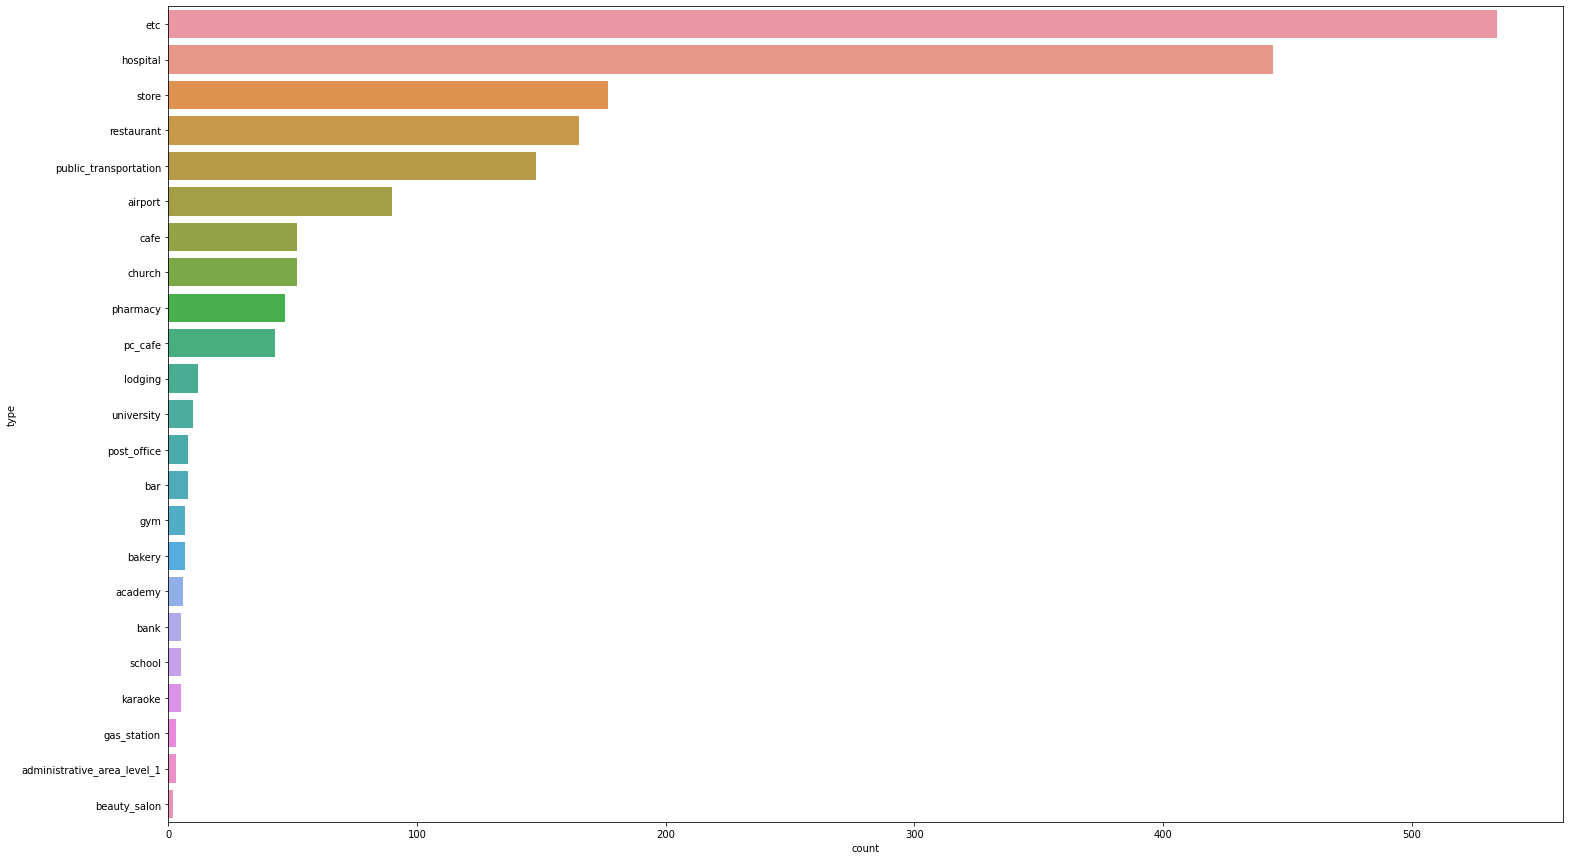

In [24]:
plt.figure(figsize=(25,15))
sns.countplot(data=patient_df, y='type', order=patient_df['type'].value_counts().index)

* 20대가 주로 방문한 장소는 etc, 병원, 상점, 음식점, 대중 교통을 주로 방문한 것을 파악할 수 있음

In [25]:
# 2번째로 확진자가 많은 50대를 분석
age_50s = PatientInfo[PatientInfo['age']=='50s']
age_50s.head()

patient_id  global_num     sex  birth_year  age country province  \
0   1000000001         2.0    male      1964.0  50s   Korea    Seoul   
2   1000000003         6.0    male      1964.0  50s   Korea    Seoul   
5   1000000006        10.0  female      1966.0  50s   Korea    Seoul   
10  1000000011        23.0  female      1962.0  50s   China    Seoul   
22  1000000023       188.0    male      1961.0  50s   Korea    Seoul   

            city disease        infection_case  infection_order   infected_by  \
0     Gangseo-gu     NaN       overseas inflow              1.0           NaN   
2      Jongno-gu     NaN  contact with patient              2.0  2.002000e+09   
5      Jongno-gu     NaN  contact with patient              3.0  1.000000e+09   
10  Seodaemun-gu     NaN       overseas inflow              1.0           NaN   
22     Seocho-gu     NaN    Shincheonji Church              NaN           NaN   

    contact_number symptom_onset_date confirmed_date released_date  \
0             75.0         2020-01-22     2020-01-23    2020-02-05   
2             17.0                NaN     2020-01-30    2020-02-19   
5             43.0                NaN     2020-01-31    2020-02-19   
10            23.0                NaN     2020-02-06    2020-02-29   
22             NaN                NaN     2020-02-21           NaN   

   deceased_date     state  
0            NaN  released  
2            NaN  released  
5            NaN  released  
10           NaN  released  
22           NaN  released

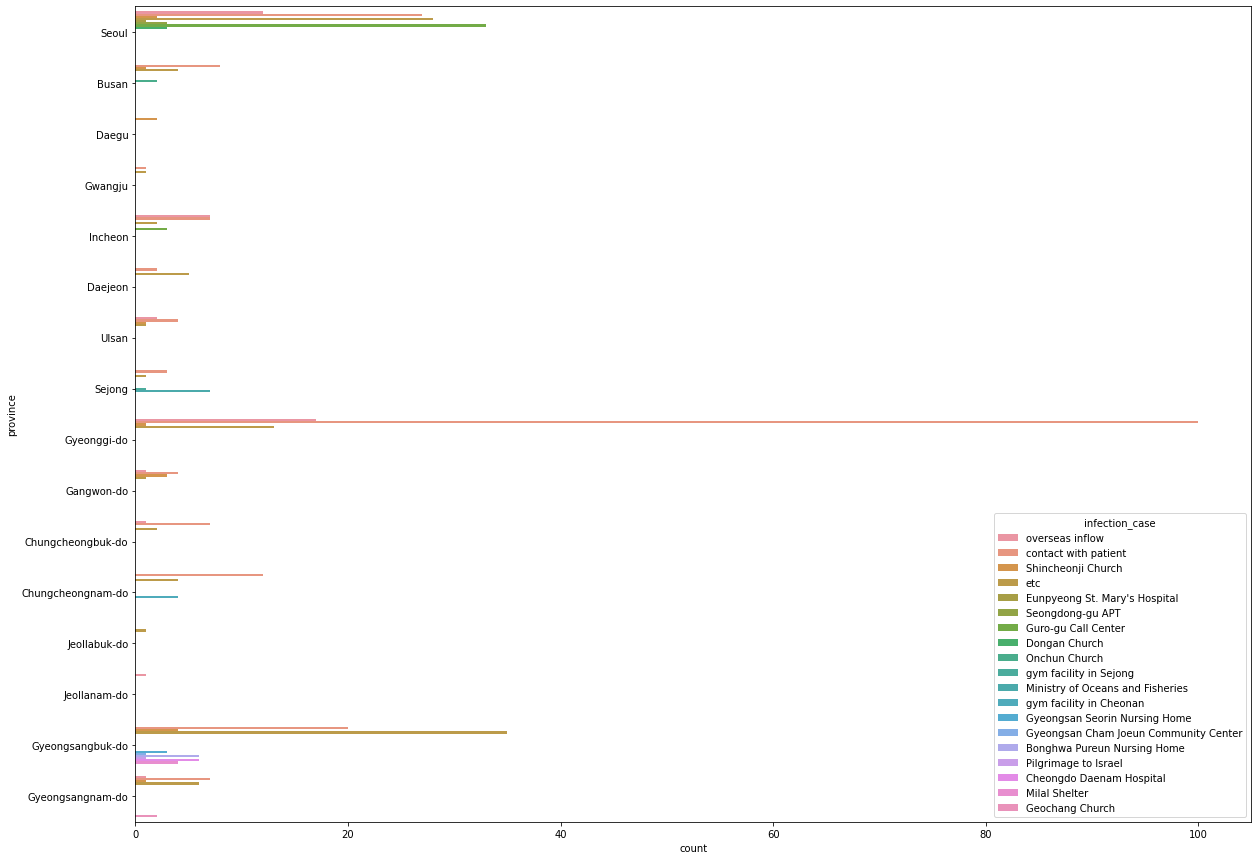

In [26]:
plt.figure(figsize=(20,15))
sns.countplot(data=age_50s, y='province', hue='infection_case')

In [27]:
age_50_seoul = age_50s['province']=='Seoul'
age_50_gyeonggi_do = age_50s['province']=='Gyeonggi-do'
age_50_gyeonsangbuk_do = age_50s['province']=='Gyeongsangbuk-do'

age_50_3top = age_50s[age_50_seoul|age_50_gyeonggi_do|age_50_gyeonsangbuk_do]
age_50_3top

patient_id  global_num     sex  birth_year  age country  \
0     1000000001         2.0    male      1964.0  50s   Korea   
2     1000000003         6.0    male      1964.0  50s   Korea   
5     1000000006        10.0  female      1966.0  50s   Korea   
10    1000000011        23.0  female      1962.0  50s   China   
22    1000000023       188.0    male      1961.0  50s   Korea   
...          ...         ...     ...         ...  ...     ...   
3215  6023000009       506.0  female         NaN  50s   Korea   
3218  6023000012       869.0  female         NaN  50s   Korea   
3230  6023000024      3440.0    male         NaN  50s   Korea   
3231  6023000025      3441.0  female         NaN  50s   Korea   
3240  6023000034         NaN  female         NaN  50s   Korea   

              province          city disease        infection_case  \
0                Seoul    Gangseo-gu     NaN       overseas inflow   
2                Seoul     Jongno-gu     NaN  contact with patient   
5                Seoul     Jongno-gu     NaN  contact with patient   
10               Seoul  Seodaemun-gu     NaN       overseas inflow   
22               Seoul     Seocho-gu     NaN    Shincheonji Church   
...                ...           ...     ...                   ...   
3215  Gyeongsangbuk-do     Pohang-si     NaN                   NaN   
3218  Gyeongsangbuk-do     Pohang-si     NaN  contact with patient   
3230  Gyeongsangbuk-do     Pohang-si     NaN  contact with patient   
3231  Gyeongsangbuk-do     Pohang-si     NaN  contact with patient   
3240  Gyeongsangbuk-do     Pohang-si     NaN  contact with patient   

      infection_order   infected_by  contact_number symptom_onset_date  \
0                 1.0           NaN            75.0         2020-01-22   
2                 2.0  2.002000e+09            17.0                NaN   
5                 3.0  1.000000e+09            43.0                NaN   
10                1.0           NaN            23.0                NaN   
22                NaN           NaN             NaN                NaN   
...               ...           ...             ...                ...   
3215              NaN           NaN             NaN                NaN   
3218              NaN  6.023000e+09             NaN                NaN   
3230              NaN  6.023000e+09             NaN                NaN   
3231              NaN  6.023000e+09             NaN                NaN   
3240              NaN  6.023000e+09             NaN                NaN   

     confirmed_date released_date deceased_date     state  
0        2020-01-23    2020-02-05           NaN  released  
2        2020-01-30    2020-02-19           NaN  released  
5        2020-01-31    2020-02-19           NaN  released  
10       2020-02-06    2020-02-29           NaN  released  
22       2020-02-21           NaN           NaN  released  
...             ...           ...           ...       ...  
3215     2020-02-23    2020-03-28           NaN  released  
3218     2020-02-24    2020-03-24           NaN  released  
3230     2020-02-29           NaN           NaN  isolated  
3231     2020-02-29           NaN           NaN  isolated  
3240     2020-03-05    2020-03-19           NaN  released  

[462 rows x 18 columns]

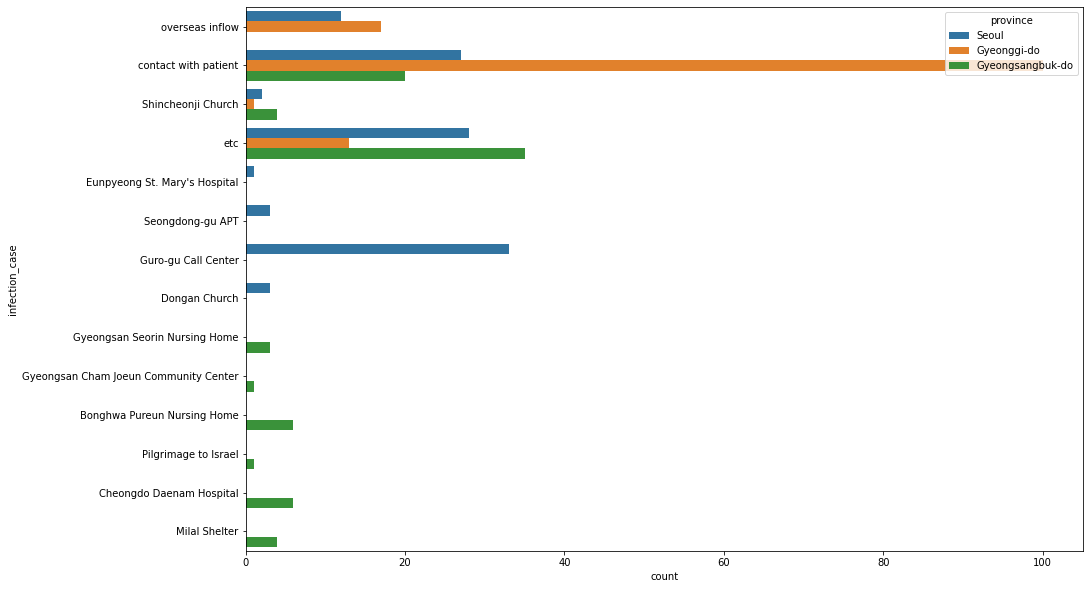

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=age_50_3top, y='infection_case',hue='province')

* 서울은 구로구 콜센터, 확진자 접촉, etc에서 주로 확진되었음
* 경기도는 확진자 접촉, 해외유입, etc에서 주로 확진되었음
* 경상북도는 etc, 확진자 접촉, 봉화 푸른 요양병원에서 주로 확진되었음

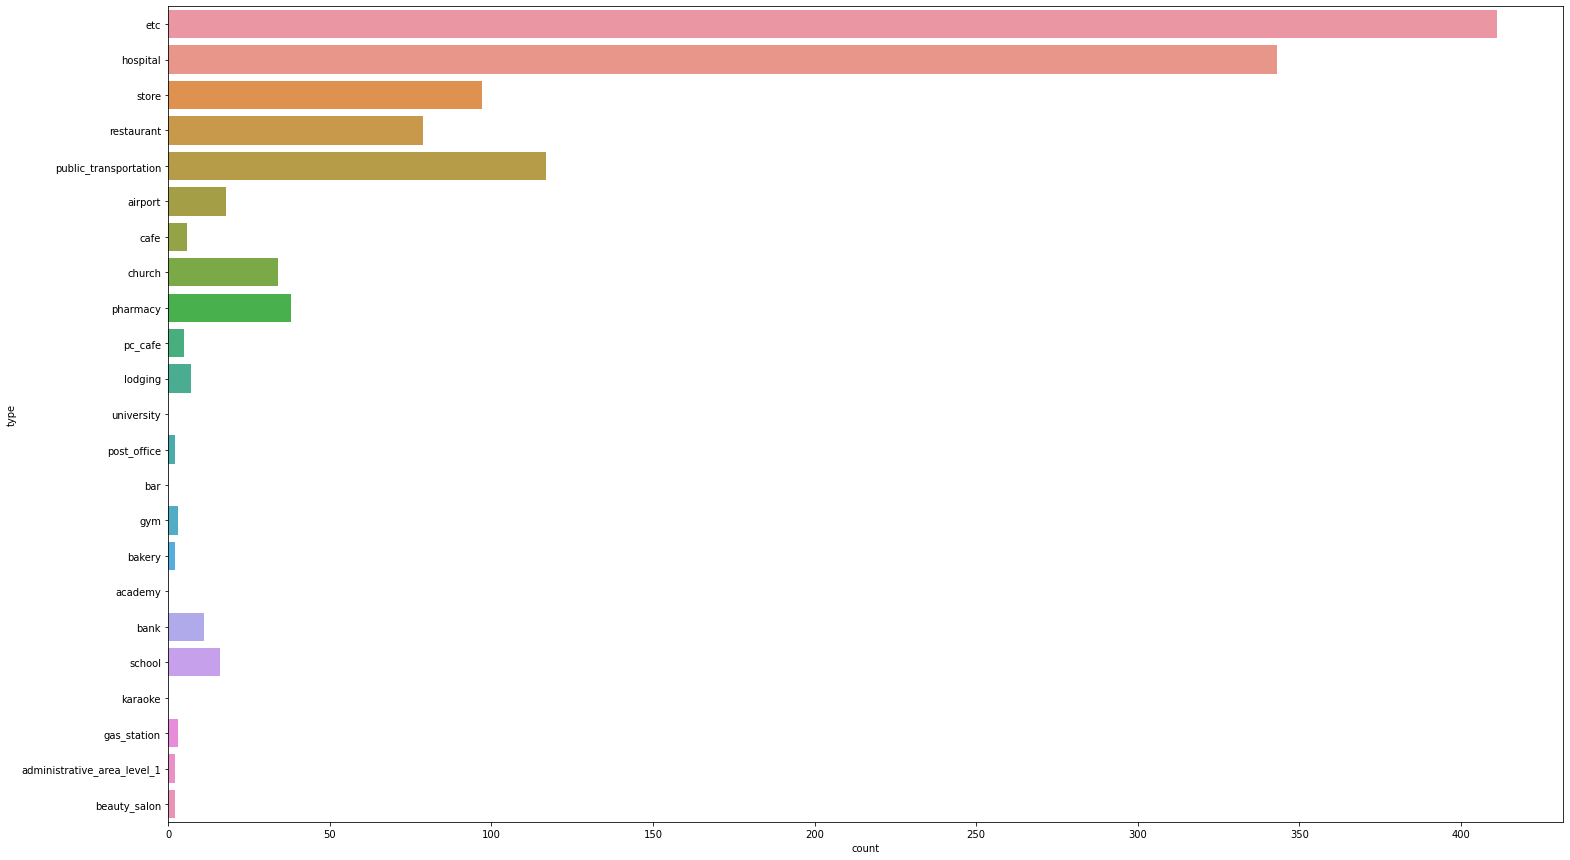

In [29]:
patient_50df = PatientRoute[PatientRoute['patient_id'].isin(age_50s['patient_id'])]
plt.figure(figsize=(25,15))
sns.countplot(data=patient_50df, y='type', order=patient_df['type'].value_counts().index)

* 50대가 주로 방문한 장소는 etc, 병원, 대중 교통, 상점으로 나옴


In [30]:
# etc가 많은 시/도
PatientInfo[PatientInfo['infection_case']=='etc']['province'].value_counts()

Gyeongsangbuk-do     251
Seoul                 98
Gyeonggi-do           81
Gyeongsangnam-do      28
Busan                 22
Chungcheongnam-do     18
Chungcheongbuk-do     16
Daejeon               15
Incheon                8
Gangwon-do             8
Ulsan                  6
Jeollabuk-do           6
Sejong                 4
Jeollanam-do           4
Jeju-do                4
Gwangju                3
Name: province, dtype: int64

# PatientInfo 분석 내용

* 전체적으로 20대와 50대가 확진자의 비중이 높음

* 전체적으로 여성 확진자의 비중이 높음

* 20대의 주 확진 지역은 서울, 경기도, 경상북도 3개의 지역에서 주로 확진이 발생한 것을 볼 수 있음
 * 서울은 해외유입, 확진자 접촉, etc에서 주로 확진되었음
 * 경기도는 해외유입, 확진자 접촉, etc에서 주로 확진되었음
 * 경상북도는 etc, 확진자 접촉, 신천지 교회에서 주로 확진되었음
 * 20대가 주로 방문한 장소는 etc, 병원, 상점, 음식점, 대중 교통을 주로 방문한 것을 파악할 수 있음

* 50대의 주 확진 지역은 서울, 경기도, 경상북도 3개의 지역에서 주로 확진이 발생한 것을 볼 수 있음
 * 서울은 구로구 콜센터, 확진자 접촉, etc에서 주로 확진되었음
 * 경기도는 확진자 접촉, 해외유입, etc에서 주로 확진되었음
 * 경상북도는 etc, 확진자 접촉, 봉화 푸른 요양병원에서 주로 확진되었음
 * 50대가 주로 방문한 장소는 etc, 병원, 대중 교통, 상점으로 나옴

# 만약 신천지 교회 발 확진이 없었다면 어땠을까? 라는 가설을 가지고 접근

In [31]:
info = PatientInfo.copy()
case = Case.copy()
route = PatientRoute.copy()

In [32]:
info.describe()

patient_id    global_num   birth_year  infection_order   infected_by  \
count  3.388000e+03   2276.000000  2927.000000        31.000000  8.220000e+02   
mean   3.498439e+09   6737.086555  1975.068329         2.387097  2.667213e+09   
std    2.201996e+09   3333.136141    20.275295         1.453213  1.741377e+09   
min    1.000000e+09      1.000000  1916.000000         1.000000  1.000000e+09   
25%    1.300000e+09   4270.000000  1961.000000         1.000000  1.200000e+09   
50%    2.000001e+09   7933.000000  1975.000000         2.000000  2.000000e+09   
75%    6.001001e+09   9516.750000  1993.000000         3.000000  4.100000e+09   
max    7.000000e+09  10758.000000  2020.000000         6.000000  7.000000e+09   

       contact_number  
count      643.000000  
mean        18.129082  
std         73.730420  
min          0.000000  
25%          2.000000  
50%          4.000000  
75%         13.000000  
max       1160.000000

In [33]:
case.describe()

case_id    confirmed
count  1.120000e+02   112.000000
mean   3.040183e+06    87.937500
std    2.052266e+06   440.500949
min    1.000001e+06     0.000000
25%    1.200009e+06     5.000000
50%    2.000002e+06    10.000000
75%    5.100002e+06    33.000000
max    7.000003e+06  4510.000000

In [34]:
route.describe()

patient_id    global_num     latitude    longitude
count  6.714000e+03   3571.000000  6714.000000  6714.000000
mean   2.532928e+09   6580.718566    36.778749   127.620624
std    2.007891e+09   3504.989274     0.912669     0.896171
min    1.000000e+09      2.000000    33.454642   126.301005
25%    1.000000e+09   3616.000000    35.968491   126.938325
50%    1.100000e+09   7734.000000    37.342219   127.106278
75%    4.100000e+09   9434.000000    37.515695   128.492610
max    6.100000e+09  10750.000000    38.193169   129.475746

## PatientInfo, Case의 데이터의 신천지 교회와 신천지 교회를 제거한 데이터로 분리

In [35]:
info_shin = info[info['infection_case']=='Shincheonji Church']
info_non_shin = info[info['infection_case']!='Shincheonji Church']
case_shin = case[case['infection_case']=='Shincheonji Church']
case_non_shin = case[case['infection_case']!='Shincheonji Church']

print(len(info_shin))
print(len(info_non_shin))
print(len(case_shin))
print(len(case_non_shin))

107
3281
15
97


## 신천지 교회와 신천지 교회를 제거한 도시의 데이터

In [36]:
info_shin = info_shin.sort_values(by='confirmed_date')
info_non_shin = info_non_shin.sort_values(by='confirmed_date')

In [37]:
info_shin_province = info_shin['province'].value_counts()
info_non_shin_province = info_non_shin['province'].value_counts()

In [38]:
#신천지 교회 도시 별 감염 비율 시각화
fig = px.pie(info_shin_province, values='province', names= info_shin_province.index, title='신천지 교회 도시별 감염 비율')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#신천지 교회를 제외한 도시 별 감염 비율 시각화
fig_non = px.pie(info_non_shin_province, values='province', names= info_non_shin_province.index, title='신천지 교회를 제외한 도시 별 감염 비율')
fig_non.update_traces(textposition='inside', textinfo='percent+label')
fig_non.show()

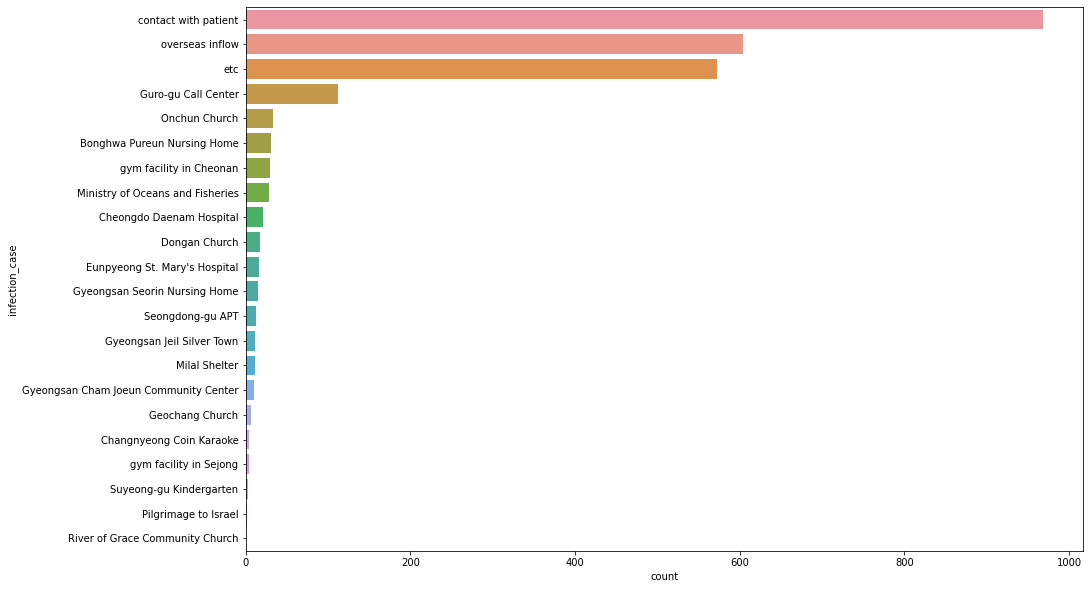

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(data=info_non_shin, y='infection_case', order=info_non_shin['infection_case'].value_counts().index)

* 신천지 교회 확진자 데이터는 주로 영남권에서 발생한 것을 확인
* 신천지 교회를 제외한 확진자 데이터는 경북, 경기, 서울이 많은 비중을 차지하는 것을 확인
* 신천지 교회를 제외한 확진자 데이터의 감염유형은 환자접촉, 해외유입, etc의 비중이 많은 부분을 차지함

## 연령대 별 확진자

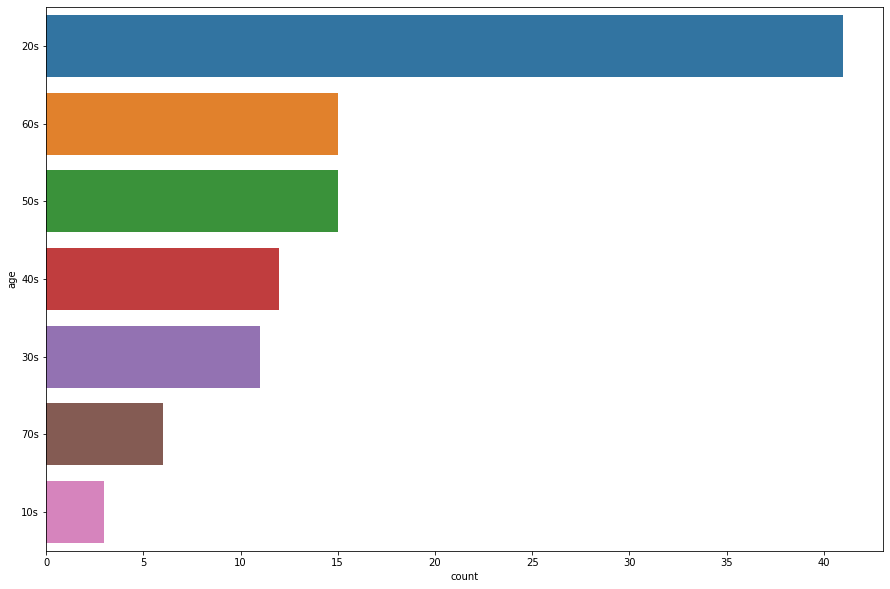

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=info_shin, y='age', order=info_shin['age'].value_counts().index)

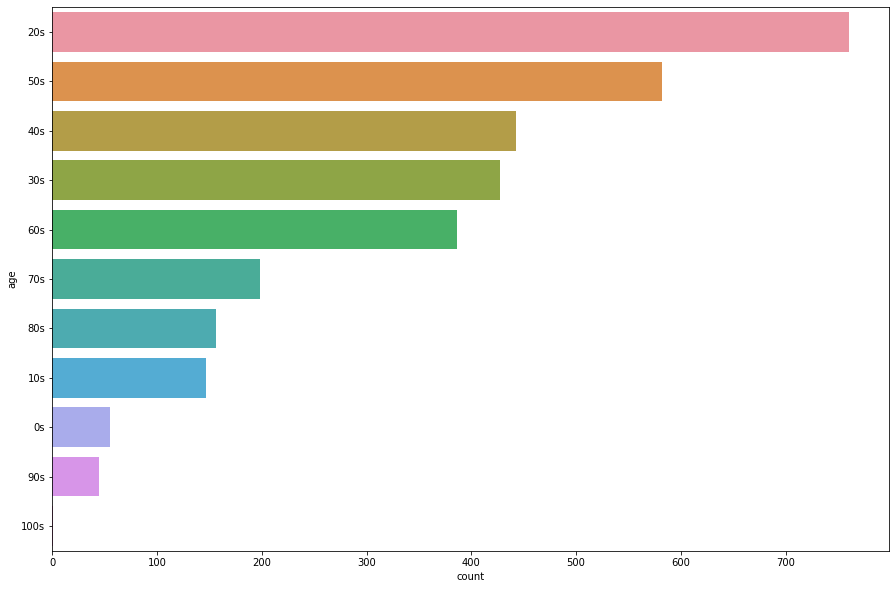

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(data=info_non_shin, y='age', order=info_non_shin['age'].value_counts().index)

In [42]:
non_20s = info_non_shin['age'] == '20s'
non_50s = info_non_shin['age'] == '50s'
info_non_shin_age = info_non_shin[non_20s|non_50s]

age20sID = info_non_shin_age[info_non_shin_age["age"]=="20s"][["patient_id"]]
age50sID = info_non_shin_age[info_non_shin_age["age"]=="50s"][["patient_id"]]

type_20s = route[route["patient_id"].isin(age20sID["patient_id"])]
type_50s = route[route["patient_id"].isin(age50sID["patient_id"])]


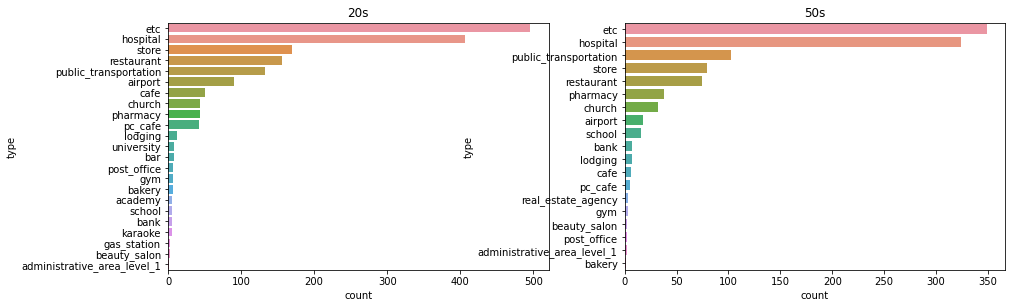

In [43]:
# 20, 50대의 연령대별 방문 유형을 시각화

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("20s")
sns.countplot(data=type_20s, y="type", order = type_20s['type'].value_counts().index)
plt.subplot(222)
plt.title("50s")
sns.countplot(data=type_50s, y="type", order = type_50s['type'].value_counts().index)

* 신천지 교회 확진자 데이터의 연령대는 20, 60, 50대가 많은 비중을 가지고 있음

* 신천지 교회 제외한 확진자 데이터의 연령대는 20, 50, 40대가 많은 비중을 가지고 있음

* 신천지 교회 제외한 확진자 데이터의 20대 방문 유형으로는 etc, 병원, 상점, 음식점, 대중교통, 공항으로 크게 분류할 수 있음

* 신천지 교회 제외한 확진자 데이터의 50대 방문 유형으로는 etc, 병원, 대중교통, 상점, 음식점, 약국으로 크게 분류할 수 있음

* etc는 알수 없기 때문에 제외하고 20대가 공항 방문이 5번째이기 때문에 해외유입에 영향이 있다고 생각함

## 신천지가 없었다면 해외유입에 의한 확진이 발생할 가능성이 높음

In [44]:
info_non_shin['country'].value_counts()

Korea            3255
China              10
United States       6
Thailand            2
Mongolia            1
Switzerland         1
France              1
Germany             1
Indonesia           1
Canada              1
Spain               1
Vietnam             1
Name: country, dtype: int64

In [45]:
info_non_shin_oversea = info_non_shin[info_non_shin['infection_case']== 'overseas inflow']
info_non_shin_oversea

patient_id  global_num     sex  birth_year  age country  \
860   1400000001         1.0  female      1985.0  30s   China   
0     1000000001         2.0    male      1964.0  50s   Korea   
1081  2000000001         3.0    male      1966.0  50s   Korea   
1082  2000000002         4.0    male      1964.0  50s   Korea   
1     1000000002         5.0    male      1987.0  30s   Korea   
...          ...         ...     ...         ...  ...     ...   
1754  2000000674     10742.0  female      1997.0  20s   Korea   
631   1000000632     10749.0     NaN         NaN  NaN   Korea   
1756  2000000676     10757.0  female      1998.0  20s   Korea   
1996  4100000143         NaN    male      1981.0  30s   Korea   
1757  2000000677         NaN  female      1999.0  20s   Korea   

               province            city disease   infection_case  \
860             Incheon             etc     NaN  overseas inflow   
0                 Seoul      Gangseo-gu     NaN  overseas inflow   
1081        Gyeonggi-do       Goyang-si     NaN  overseas inflow   
1082        Gyeonggi-do   Pyeongtaek-si     NaN  overseas inflow   
1                 Seoul     Jungnang-gu     NaN  overseas inflow   
...                 ...             ...     ...              ...   
1754        Gyeonggi-do       Yongin-si     NaN  overseas inflow   
631               Seoul       Gwanak-gu     NaN  overseas inflow   
1756        Gyeonggi-do       Yongin-si     NaN  overseas inflow   
1996  Chungcheongnam-do      Cheonan-si     NaN  overseas inflow   
1757        Gyeonggi-do  Gwangmyeong-si     NaN  overseas inflow   

      infection_order  infected_by  contact_number symptom_onset_date  \
860               NaN          NaN             NaN         2020-01-19   
0                 1.0          NaN            75.0         2020-01-22   
1081              1.0          NaN            16.0                NaN   
1082              1.0          NaN            95.0                NaN   
1                 1.0          NaN            31.0                NaN   
...               ...          ...             ...                ...   
1754              NaN          NaN             NaN                NaN   
631               NaN          NaN             NaN                NaN   
1756              NaN          NaN             NaN                NaN   
1996              NaN          NaN             4.0                NaN   
1757              NaN          NaN             NaN                NaN   

     confirmed_date released_date deceased_date     state  
860      2020-01-20    2020-02-06           NaN  released  
0        2020-01-23    2020-02-05           NaN  released  
1081     2020-01-26    2020-02-12           NaN  released  
1082     2020-01-27    2020-02-09           NaN  released  
1        2020-01-30    2020-03-02           NaN  released  
...             ...           ...           ...       ...  
1754     2020-04-27           NaN           NaN  isolated  
631      2020-04-27           NaN           NaN  isolated  
1756     2020-04-28           NaN           NaN  isolated  
1996     2020-04-28           NaN           NaN  isolated  
1757     2020-04-29           NaN           NaN  isolated  

[604 rows x 18 columns]

In [46]:
info_non_shin_over_province = info_non_shin_oversea['province'].value_counts()

#해외유입 도시 별 감염 비율 시각화
fig = px.pie(info_non_shin_over_province, values='province', names= info_non_shin_over_province.index, title='해외 유입 도시 별 감염 비율')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [47]:
route[route['global_num']==1.0]

Empty DataFrame
Columns: [patient_id, global_num, date, province, city, type, latitude, longitude]
Index: []

In [48]:
case_non_shin[case_non_shin['case_id']==1400000001]

Empty DataFrame
Columns: [case_id, province, city, group, infection_case, confirmed, latitude, longitude]
Index: []

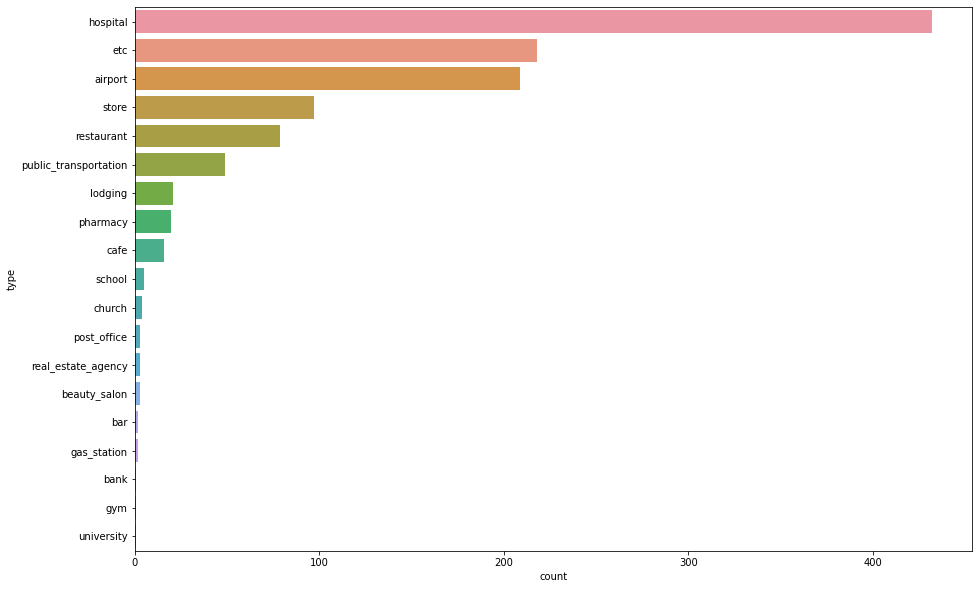

In [49]:
type_over = route[route["patient_id"].isin(info_non_shin_oversea["patient_id"])]

plt.figure(figsize=(15,10))
sns.countplot(data=type_over, y='type', order=type_over['type'].value_counts().index)

* 해외유입의 확진자들이 발생한 지역으로는 서울, 경기, 인천으로 수도권에서 많이 발생
* 해외유입의 확진자들의 방문유형 중 3번째로 큰 비중이 공항으로 나옴
* 국내 첫 확진자도 중국에서 들어온 사람이 첫 확진자
* 이동 경로를 확인하려 했으나 Case, route에서 첫 확진자의 데이터가 없음

In [50]:
info_non_shin_oversea_seoul = info_non_shin_oversea[info_non_shin_oversea['province']=='Seoul']
info_non_shin_oversea_seoul['confirmed_date'] = pd.to_datetime(info_non_shin_oversea_seoul['confirmed_date'], format = '%Y-%m-%d')
info_non_shin_oversea_ggd = info_non_shin_oversea[info_non_shin_oversea['province']=='Gyeonggi-do']
info_non_shin_oversea_ggd['confirmed_date'] = pd.to_datetime(info_non_shin_oversea_ggd['confirmed_date'], format = '%Y-%m-%d')
info_non_shin_oversea_inc = info_non_shin_oversea[info_non_shin_oversea['province']=='Incheon']
info_non_shin_oversea_inc['confirmed_date'] = pd.to_datetime(info_non_shin_oversea_inc['confirmed_date'], format = '%Y-%m-%d')

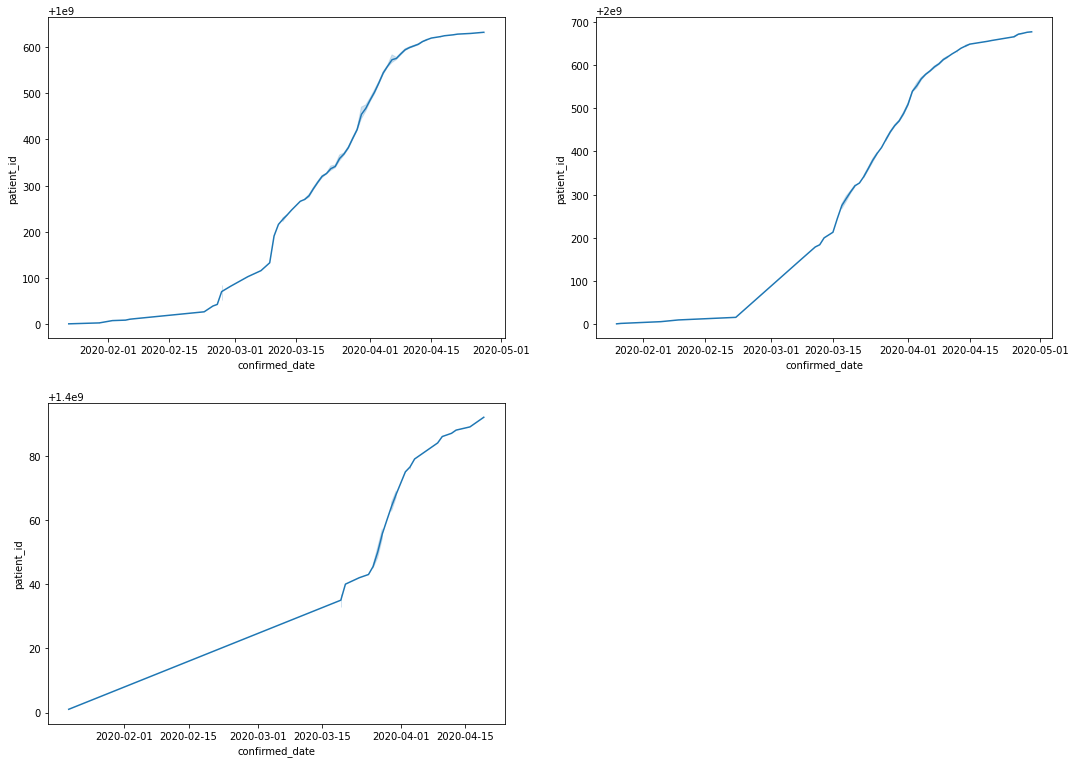

In [51]:
plt.figure(figsize=(18,13))
plt.subplot(221)
sns.lineplot(data=info_non_shin_oversea_seoul, x='confirmed_date', y='patient_id')
plt.subplot(222)
sns.lineplot(data=info_non_shin_oversea_ggd, x='confirmed_date', y='patient_id')
plt.subplot(223)
sns.lineplot(data=info_non_shin_oversea_inc, x='confirmed_date', y='patient_id')

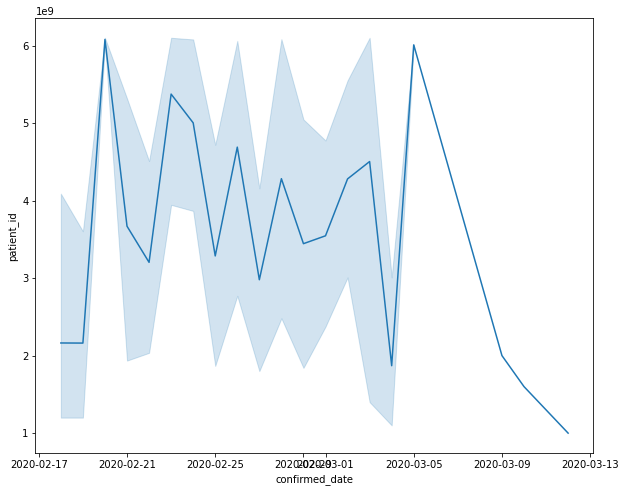

In [52]:
info_shin['confirmed_date'] = pd.to_datetime(info_shin['confirmed_date'], format = '%Y-%m-%d')
plt.figure(figsize=(10,8))
sns.lineplot(data=info_shin, x='confirmed_date', y='patient_id')

* 해외유입의 서울,경기,인천은 2월 중순부터 꾸준히 상승하다가 3월 15일 이후 급상승하는 그래프를 볼 수 있음
* 신천지는 2월 18일, 3월 6일 급상승하고 9일까지 급하락하는 그래프를 통해 18일,6일에 확진자가 크게 발생할 만한 일이 생긴것으로 추측

In [53]:
info_non_shin[info_non_shin['confirmed_date']>'2020-03-14']['infection_case'].value_counts()

overseas inflow                          562
contact with patient                     477
etc                                      218
Guro-gu Call Center                       20
Bonghwa Pureun Nursing Home               10
Ministry of Oceans and Fisheries           6
Dongan Church                              4
Gyeongsan Seorin Nursing Home              3
Gyeongsan Cham Joeun Community Center      2
Eunpyeong St. Mary's Hospital              2
River of Grace Community Church            1
gym facility in Sejong                     1
gym facility in Cheonan                    1
Name: infection_case, dtype: int64

In [54]:
info_shin['country'].value_counts()

Korea    106
China      1
Name: country, dtype: int64

In [55]:
info_non_shin['country'].value_counts()

Korea            3255
China              10
United States       6
Thailand            2
Mongolia            1
Switzerland         1
France              1
Germany             1
Indonesia           1
Canada              1
Spain               1
Vietnam             1
Name: country, dtype: int64

In [56]:
info_non_shin[info_non_shin['country']=='China']['infection_case'].value_counts()

overseas inflow                  6
contact with patient             3
Eunpyeong St. Mary's Hospital    1
Name: infection_case, dtype: int64

In [57]:
info_non_shin_oversea['country'].value_counts()

Korea            584
China              6
United States      6
Switzerland        1
France             1
Thailand           1
Germany            1
Indonesia          1
Canada             1
Spain              1
Vietnam            1
Name: country, dtype: int64

## 해외유입은 주로 외국인에 의해 영향을 받았을꺼라고 추측

* 입국한 외국인의 확진자 수 파악 후 감염유형 파악

* 대부분 해외유입으로 감염되었고 중국인의 4명만 다른 유형으로 감염

* 외국인들의 이동경로가 수도권에서 많이 발생하면 국내 해외유입에 영향을 미쳤다고 추측

In [58]:
info_non_shin['symptom_onset_date'].unique()

array(['2020-01-19', '2020-01-22', nan, '2020-01-26', '2020-02-01',
       '2020-01-27', '2020-02-04', '2020-02-06', '2020-02-11',
       '2020-02-20', '2020-02-18', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-19', '2020-02-16', '2020-02-24',
       '2020-01-31', '2020-02-13', '2020-02-15', '2020-02-25',
       '2020-02-27', '2020-02-26', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-04', '2020-03-05',
       '2020-03-03', '2020-03-06', '2020-03-07', '2020-03-09',
       '2020-03-08', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-15', '2020-03-13', '2020-03-16', '2020-03-14',
       '2020-03-17', '2020-03-18', '2020-03-28', '2020-03-19',
       '2020-03-21', '2020-03-20', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-27', '2020-03-26',
       '2020-03-29', ' ', '2020-03-31', '2020-03-30', '2020-04-02',
       '2020-04-01', '2020-04-04', '2020-04-03', '2020-04-06',
       '2020-04-05', '2020-04-07', '2020-04-0

In [59]:
info_non_shin['symptom_onset_date'] = info_non_shin['symptom_onset_date'].replace(' ', np.NaN)
info_non_shin['symptom_onset_date'].unique()

array(['2020-01-19', '2020-01-22', nan, '2020-01-26', '2020-02-01',
       '2020-01-27', '2020-02-04', '2020-02-06', '2020-02-11',
       '2020-02-20', '2020-02-18', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-19', '2020-02-16', '2020-02-24',
       '2020-01-31', '2020-02-13', '2020-02-15', '2020-02-25',
       '2020-02-27', '2020-02-26', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-04', '2020-03-05',
       '2020-03-03', '2020-03-06', '2020-03-07', '2020-03-09',
       '2020-03-08', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-15', '2020-03-13', '2020-03-16', '2020-03-14',
       '2020-03-17', '2020-03-18', '2020-03-28', '2020-03-19',
       '2020-03-21', '2020-03-20', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-27', '2020-03-26',
       '2020-03-29', '2020-03-31', '2020-03-30', '2020-04-02',
       '2020-04-01', '2020-04-04', '2020-04-03', '2020-04-06',
       '2020-04-05', '2020-04-07', '2020-04-09', '

In [60]:
info_non_shin['confirmed_date'] = pd.to_datetime(info_non_shin['confirmed_date'])
info_non_shin['symptom_onset_date'] = pd.to_datetime(info_non_shin['symptom_onset_date'])
info_non_shin['diff']=info_non_shin['confirmed_date']-info_non_shin['symptom_onset_date']
info_non_shin.describe()

patient_id    global_num   birth_year  infection_order   infected_by  \
count  3.281000e+03   2232.000000  2840.000000        31.000000  8.150000e+02   
mean   3.490761e+09   6844.090502  1974.928873         2.387097  2.679815e+09   
std    2.201862e+09   3264.136216    20.334293         1.453213  1.743502e+09   
min    1.000000e+09      1.000000  1916.000000         1.000000  1.000000e+09   
25%    1.300000e+09   4709.750000  1961.000000         1.000000  1.300000e+09   
50%    2.000001e+09   8013.500000  1975.000000         2.000000  2.000000e+09   
75%    6.001000e+09   9540.250000  1993.000000         3.000000  4.100000e+09   
max    7.000000e+09  10758.000000  2020.000000         6.000000  7.000000e+09   

       contact_number                       diff  
count      617.000000                        473  
mean        15.068071  4 days 20:26:53.530655391  
std         55.249627  6 days 06:29:45.682644187  
min          0.000000          -8 days +00:00:00  
25%          2.000000            1 days 00:00:00  
50%          4.000000            3 days 00:00:00  
75%         11.000000            6 days 00:00:00  
max       1091.000000           48 days 00:00:00

In [61]:
info_non_shin_kor = info_non_shin[info_non_shin['country']=='Korea']
info_non_shin_cou = info_non_shin[info_non_shin['country']!='Korea']
not_kor = route[route["patient_id"].isin(info_non_shin_cou["patient_id"])]
not_kor = not_kor.sort_values(by='date')
not_kor

patient_id  global_num        date           province          city  \
4175  2000000010        27.0  2020-01-31            Incheon    Namdong-gu   
4174  2000000010        27.0  2020-01-31            Incheon    Namdong-gu   
37    1000000011        23.0  2020-02-02              Seoul       Jung-gu   
38    1000000011        23.0  2020-02-02              Seoul  Seodaemun-gu   
39    1000000011        23.0  2020-02-02              Seoul       Mapo-gu   
...          ...         ...         ...                ...           ...   
5374  4100000139         NaN  2020-04-11  Chungcheongnam-do  Seocheon-gun   
5371  4100000139         NaN  2020-04-11  Chungcheongnam-do  Seocheon-gun   
5372  4100000139         NaN  2020-04-11  Chungcheongnam-do  Seocheon-gun   
5373  4100000139         NaN  2020-04-11  Chungcheongnam-do  Seocheon-gun   
5375  4100000139         NaN  2020-04-11  Chungcheongnam-do    Cheonan-si   

            type   latitude   longitude  
4175     airport  37.456256  126.705206  
4174     airport  37.456256  126.705206  
37         store  37.564846  126.981927  
38           etc  37.579116  126.936779  
39         store  37.542371  126.953362  
...          ...        ...         ...  
5374         etc  36.080331  126.691328  
5371         etc  36.121813  126.752916  
5372    hospital  36.082321  126.689732  
5373  restaurant  36.077530  126.691260  
5375    hospital  36.803475  127.135567  

[72 rows x 8 columns]

In [62]:
info_non_shin_cou

patient_id  global_num     sex  birth_year  age        country  \
860   1400000001         1.0  female      1985.0  30s          China   
1083  2000000003        12.0    male      1971.0  40s          China   
1084  2000000004        14.0  female      1980.0  40s          China   
10    1000000011        23.0  female      1962.0  50s          China   
1090  2000000010        27.0  female      1982.0  30s          China   
1091  2000000011        28.0  female      1989.0  30s          China   
29    1000000030       755.0    male      1954.0  60s          China   
38    1000000039       924.0  female      1945.0  70s          China   
1119  2000000039       875.0    male      1984.0  30s       Mongolia   
1759  3001000002         NaN    male         NaN  20s          China   
2810  6006000017         NaN  female      1993.0  20s       Thailand   
736   1100000104         NaN    male      1996.0  20s    Switzerland   
3380  7000000006      9087.0    male         NaN  30s  United States   
334   1000000335      9085.0    male      1982.0  30s  United States   
337   1000000338      9096.0  female      1998.0  20s  United States   
376   1000000377      9388.0  female      1985.0  30s         France   
378   1000000379      9368.0    male      1981.0  30s       Thailand   
744   1100000112         NaN    male      1994.0  20s        Germany   
751   1100000119         NaN    male      1994.0  20s      Indonesia   
473   1000000474      9864.0  female      1985.0  30s         Canada   
2026  5100000013      9840.0    male      1998.0  20s          Spain   
498   1000000499     10028.0    male      1991.0  20s  United States   
1988  4100000135         NaN    male      1973.0  40s  United States   
1992  4100000139         NaN  female      1959.0  60s  United States   
756   1100000124         NaN  female      2000.0  20s        Vietnam   
3387  7000000013         NaN  female         NaN  10s          China   

               province          city disease                 infection_case  \
860             Incheon           etc     NaN                overseas inflow   
1083        Gyeonggi-do    Bucheon-si     NaN           contact with patient   
1084        Gyeonggi-do     Goyang-si     NaN           contact with patient   
10                Seoul  Seodaemun-gu     NaN                overseas inflow   
1090        Gyeonggi-do    Siheung-si     NaN                overseas inflow   
1091        Gyeonggi-do     Goyang-si     NaN           contact with patient   
29                Seoul   Gangdong-gu     NaN  Eunpyeong St. Mary's Hospital   
38                Seoul  Geumcheon-gu     NaN                overseas inflow   
1119        Gyeonggi-do  Namyangju-si     NaN                            etc   
1759         Gangwon-do  Gangneung-si     NaN                overseas inflow   
2810   Gyeongsangbuk-do   Gimcheon-si     NaN           contact with patient   
736               Busan    Dongnae-gu     NaN                overseas inflow   
3380            Jeju-do       Jeju-do     NaN                overseas inflow   
334               Seoul    Gangseo-gu     NaN                overseas inflow   
337               Seoul   Jungnang-gu     NaN                overseas inflow   
376               Seoul     Gwanak-gu     NaN                overseas inflow   
378               Seoul  Seodaemun-gu     NaN                overseas inflow   
744               Busan  Geumjeong-gu     NaN                overseas inflow   
751               Busan           etc     NaN                overseas inflow   
473               Seoul     Jongno-gu     NaN                overseas inflow   
2026       Jeollanam-do      Yeosu-si     NaN                overseas inflow   
498               Seoul     Jongno-gu     NaN                overseas inflow   
1988  Chungcheongnam-do       Asan-si     NaN                overseas inflow   
1992  Chungcheongnam-do  Seocheon-gun     NaN                overseas inflow   
756               Busan        Nam-gu     NaN                

In [63]:
route[route['patient_id']==1000000001]

patient_id  global_num        date     province      city      type  \
0  1000000001         2.0  2020-01-22  Gyeonggi-do  Gimpo-si   airport   
1  1000000001         2.0  2020-01-24        Seoul   Jung-gu  hospital   

    latitude   longitude  
0  37.615246  126.715632  
1  37.567241  127.005659

In [64]:
kor_1st_m = folium.Map(location=[37.615246, 126.715632], tiles="cartodbpositron", zoom_start=15)
folium.Marker([37.615246, 126.715632]).add_to(kor_1st_m)

kor_1st_m

* 환자ID 1400000001은 국내 첫 확진자이고 국적이 중국 국적으로 외국인이지만 이동경로의 기록이 없음

* 환자ID 1000000001 한국인 첫 확진자이고 코로나19는 중국에서 발생한 질병이고 증상 발생 후 평균 4일 뒤 확진되기 때문에 한국인 첫 확진자 이동경로에 김포공항과 서울 중구 병원을 방문한 기록에 의해 첫 확진자와 한국인 첫확진자가 김포공항에서 경로가 겹쳤다고 추측

In [65]:
info_non_shin_cou.describe()

patient_id    global_num   birth_year  infection_order   infected_by  \
count  2.600000e+01     17.000000    23.000000          5.00000  3.000000e+00   
mean   2.350269e+09   4612.647059  1981.782609          1.80000  2.000000e+09   
std    1.948231e+09   4736.282481    14.908681          0.83666  2.921409e+02   
min    1.000000e+09      1.000000  1945.000000          1.00000  2.000000e+09   
25%    1.000000e+09     27.000000  1976.500000          1.00000  2.000000e+09   
50%    1.250000e+09    924.000000  1985.000000          2.00000  2.000000e+09   
75%    2.750750e+09   9368.000000  1993.500000          2.00000  2.000000e+09   
max    7.000000e+09  10028.000000  2000.000000          3.00000  2.000001e+09   

       contact_number             diff  
count       13.000000                3  
mean        43.692308  1 days 00:00:00  
std        114.302511  0 days 00:00:00  
min          0.000000  1 days 00:00:00  
25%          3.000000  1 days 00:00:00  
50%          6.000000  1 days 00:00:00  
75%         23.000000  1 days 00:00:00  
max        422.000000  1 days 00:00:00

In [66]:
info_non_shin_kor.describe()

patient_id    global_num   birth_year  infection_order   infected_by  \
count  3.255000e+03   2215.000000  2817.000000        26.000000  8.120000e+02   
mean   3.499871e+09   6861.216704  1974.872914         2.500000  2.682327e+09   
std    2.201658e+09   3245.882895    20.365102         1.529706  1.746233e+09   
min    1.000000e+09      2.000000  1916.000000         1.000000  1.000000e+09   
25%    1.300000e+09   4778.000000  1961.000000         1.000000  1.300000e+09   
50%    2.000001e+09   8018.000000  1975.000000         2.000000  2.000000e+09   
75%    6.001000e+09   9541.500000  1993.000000         3.000000  4.100000e+09   
max    7.000000e+09  10758.000000  2020.000000         6.000000  7.000000e+09   

       contact_number                       diff  
count      604.000000                        470  
mean        14.451987  4 days 21:02:17.872340425  
std         53.294320  6 days 06:47:39.362990945  
min          0.000000          -8 days +00:00:00  
25%          2.000000            2 days 00:00:00  
50%          4.000000            3 days 00:00:00  
75%         11.000000            6 days 00:00:00  
max       1091.000000           48 days 00:00:00

In [67]:
not_kor['type'].unique()

array(['airport', 'store', 'etc', 'restaurant', 'hospital', 'lodging',
       'public_transportation', 'school', 'university'], dtype=object)

In [68]:
not_kor_map = not_kor.groupby(["latitude", "longitude",'type']).size().reset_index(name="count")
not_kor_map


latitude   longitude                   type  count
0   35.115225  129.042243  public_transportation      1
1   35.158698  129.160384                    etc      1
2   35.160158  129.161405             restaurant      1
3   35.163600  129.158662  public_transportation      1
4   35.181741  129.176928  public_transportation      1
5   35.187234  129.059198               hospital      2
6   35.204369  129.080175               hospital      1
7   35.231210  129.085008                 school      1
8   35.231385  129.087375             restaurant      1
9   35.232329  129.086016                    etc      2
10  35.232370  129.084702                    etc      1
11  35.232473  129.086145                  store      1
12  35.232953  129.084806                    etc      1
13  35.233512  129.081005                 school      1
14  35.233512  129.081005             university      1
15  35.238099  129.088060  public_transportation      2
16  35.242047  129.092472               hospital      2
17  35.647271  128.733911                airport      1
18  35.965419  126.713677                    etc      1
19  35.966510  126.705483             restaurant      1
20  36.077530  126.691260             restaurant      1
21  36.080331  126.691328                    etc      1
22  36.082321  126.689732               hospital      1
23  36.121813  126.752916                    etc      2
24  36.794562  127.104367                airport      1
25  36.803475  127.135567               hospital      1
26  37.017220  127.260412               hospital      1
27  37.428653  126.429277                airport      1
28  37.432338  126.809912                    etc      1
29  37.432338  126.809912             restaurant      1
30  37.444546  126.789519               hospital      1
31  37.455673  126.900593               hospital      1
32  37.456256  126.705206                airport      2
33  37.460191  126.440696                airport      2
34  37.475906  126.897897               hospital      2
35  37.484217  126.932511               hospital      1
36  37.492737  126.908812               hospital      1
37  37.493337  126.924609               hospital      1
38  37.540881  127.002446                    etc      2
39  37.542371  126.953362                  store      1
40  37.553607  126.969619  public_transportation      1
41  37.564846  126.981927                  store      1
42  37.567241  127.005659               hospital      1
43  37.568359  126.967485               hospital      2
44  37.572534  126.981775               hospital      2
45  37.574975  126.981219                lodging      8
46  37.578588  126.936251               hospital      1
47  37.579116  126.936779                    etc      2
48  37.581777  126.969251               hospital      1
49  37.642134  126.831232               hospital      1
50  37.736292  128.874030                  store      1
51  37.818481  128.857753               hospital      2

In [69]:
print(not_kor_map['type'].value_counts())
print(not_kor_map['type'].value_counts(normalize=True))

hospital                 19
etc                      10
public_transportation     5
restaurant                5
airport                   5
store                     4
school                    2
university                1
lodging                   1
Name: type, dtype: int64
hospital                 0.365385
etc                      0.192308
public_transportation    0.096154
restaurant               0.096154
airport                  0.096154
store                    0.076923
school                   0.038462
university               0.019231
lodging                  0.019231
Name: type, dtype: float64


In [70]:
def map_color(data):
    for x in range(len(data)):
        if data['type'][x] == 'hospital':    
            data['color'][x] = 'blue'
        elif data['type'][x] == 'airport':    
            data['color'][x] = 'red'
        elif data['type'][x] == 'public_transportation':    
            data['color'][x] = 'green'
        elif data['type'][x] == 'restaurant':    
            data['color'][x] = 'purple'
        elif data['type'][x] == 'etc':    
            data['color'][x] = 'orange'
        else :    
            data['color'][x] = 'black'

In [71]:
not_kor_map['color']=0
map_color(not_kor_map)
not_kor_map

latitude   longitude                   type  count   color
0   35.115225  129.042243  public_transportation      1   green
1   35.158698  129.160384                    etc      1  orange
2   35.160158  129.161405             restaurant      1  purple
3   35.163600  129.158662  public_transportation      1   green
4   35.181741  129.176928  public_transportation      1   green
5   35.187234  129.059198               hospital      2    blue
6   35.204369  129.080175               hospital      1    blue
7   35.231210  129.085008                 school      1   black
8   35.231385  129.087375             restaurant      1  purple
9   35.232329  129.086016                    etc      2  orange
10  35.232370  129.084702                    etc      1  orange
11  35.232473  129.086145                  store      1   black
12  35.232953  129.084806                    etc      1  orange
13  35.233512  129.081005                 school      1   black
14  35.233512  129.081005             university      1   black
15  35.238099  129.088060  public_transportation      2   green
16  35.242047  129.092472               hospital      2    blue
17  35.647271  128.733911                airport      1     red
18  35.965419  126.713677                    etc      1  orange
19  35.966510  126.705483             restaurant      1  purple
20  36.077530  126.691260             restaurant      1  purple
21  36.080331  126.691328                    etc      1  orange
22  36.082321  126.689732               hospital      1    blue
23  36.121813  126.752916                    etc      2  orange
24  36.794562  127.104367                airport      1     red
25  36.803475  127.135567               hospital      1    blue
26  37.017220  127.260412               hospital      1    blue
27  37.428653  126.429277                airport      1     red
28  37.432338  126.809912                    etc      1  orange
29  37.432338  126.809912             restaurant      1  purple
30  37.444546  126.789519               hospital      1    blue
31  37.455673  126.900593               hospital      1    blue
32  37.456256  126.705206                airport      2     red
33  37.460191  126.440696                airport      2     red
34  37.475906  126.897897               hospital      2    blue
35  37.484217  126.932511               hospital      1    blue
36  37.492737  126.908812               hospital      1    blue
37  37.493337  126.924609               hospital      1    blue
38  37.540881  127.002446                    etc      2  orange
39  37.542371  126.953362                  store      1   black
40  37.553607  126.969619  public_transportation      1   green
41  37.564846  126.981927                  store      1   black
42  37.567241  127.005659               hospital      1    blue
43  37.568359  126.967485               hospital      2    blue
44  37.572534  126.981775               hospital      2    blue
45  37.574975  126.981219                lodging      8   black
46  37.578588  126.936251               hospital      1    blue
47  37.579116  126.936779                    etc      2  orange
48  37.581777  126.969251               hospital      1    blue
49  37.642134  126.831232               hospital      1    blue
50  37.736292  128.874030                  store      1   black
51  37.818481  128.857753               hospital      2    blue

In [72]:
# 시각화 코드 출처: https://dacon.io/competitions/official/235590/codeshare/1081?page=1&dtype=recent
m = folium.Map(location=[37.5600,126.98], tiles="cartodbpositron", zoom_start=7)
for x in range(len(not_kor_map)):
    location = [not_kor_map['latitude'][x],not_kor_map['longitude'][x]]
    radius=not_kor_map['count'][x]*3.4

    folium.CircleMarker(
        location,
        radius,
        popup=not_kor_map['type'][x],
        color=not_kor_map['color'][x],
        fill=True,
        fill_color=not_kor_map['color'][x],
        control_scale=True
        
    ).add_to(m)
m

In [73]:
not_kor[not_kor['province']=='Gyeongsangbuk-do']

patient_id  global_num        date          province          city  \
157  1000000039       924.0  2020-02-16  Gyeongsangbuk-do  Cheongdo-gun   

        type   latitude   longitude  
157  airport  35.647271  128.733911

In [74]:
info_non_shin[info_non_shin['patient_id']==1000000039]

patient_id  global_num     sex  birth_year  age country province  \
38  1000000039       924.0  female      1945.0  70s   China    Seoul   

            city disease   infection_case  infection_order  infected_by  \
38  Geumcheon-gu     NaN  overseas inflow              NaN          NaN   

    contact_number symptom_onset_date confirmed_date released_date  \
38             NaN                NaT     2020-02-25           NaN   

   deceased_date     state diff  
38           NaN  released  NaT

In [75]:
route[route['patient_id']==1000000039]

patient_id  global_num        date          province             city  \
157  1000000039       924.0  2020-02-16  Gyeongsangbuk-do     Cheongdo-gun   
158  1000000039       924.0  2020-02-21             Seoul     Geumcheon-gu   
159  1000000039       924.0  2020-02-21             Seoul  Yeongdeungpo-gu   
160  1000000039       924.0  2020-02-22             Seoul     Geumcheon-gu   
161  1000000039       924.0  2020-02-24             Seoul     Geumcheon-gu   
162  1000000039       924.0  2020-02-25             Seoul          Jung-gu   

         type   latitude   longitude  
157   airport  35.647271  128.733911  
158  hospital  37.475906  126.897897  
159  hospital  37.492737  126.908812  
160  hospital  37.475906  126.897897  
161  hospital  37.455673  126.900593  
162  hospital  37.567241  127.005659

# 신천지교회 확진자가 없었다면 분석 내용 
* 외국인들의 자주 방문한 경로 시각화를 한 결과 병원(37%), etc(17%),대중교통(10%),음식점(10%),공항(10%)이 많은 비중을 차지하고 있음

* 공항은 인천, 청주, 군산에서 확인 가능하지만 경북 청도군청의 위치에서 1명을 확인 

* 대중교통은 서울역과 부산에서 확인

* 위의 시각화에서 외국인들의 주 이동경로는 수도권과 부산이므로 외국인 해외유입 확진자는 국내 해외유입 확진자보다 평균적으로 접촉횟수가 많아서 수도권과 부산에 영향을 미친다고 판단

* 국내로 입국하는 인원들 중 병원을 여러곳 방문하는 기록이 많은 점을 보아 국내로 입국해서 병원을 가는게 이득이라고 생각할 정도록 외국인에 대한 병원 관련 복지가 좋아서 입국하는 외국인들에 대한 조치가 필요

# SeoulFloating 분석

In [76]:
SeoulFloating['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [77]:
SeoulFloating

date  hour  birth_year     sex province             city  fp_num
0       2020-01-01     0          20  female    Seoul        Dobong-gu   19140
1       2020-01-01     0          20    male    Seoul        Dobong-gu   19950
2       2020-01-01     0          20  female    Seoul    Dongdaemun-gu   25450
3       2020-01-01     0          20    male    Seoul    Dongdaemun-gu   27050
4       2020-01-01     0          20  female    Seoul       Dongjag-gu   28880
...            ...   ...         ...     ...      ...              ...     ...
431995  2020-02-29    23          70    male    Seoul     Yangcheon-gu   12080
431996  2020-02-29    23          70  female    Seoul  Yeongdeungpo-gu   17750
431997  2020-02-29    23          70    male    Seoul  Yeongdeungpo-gu   13290
431998  2020-02-29    23          70  female    Seoul       Yongsan-gu   12590
431999  2020-02-29    23          70    male    Seoul       Yongsan-gu    8560

[432000 rows x 7 columns]

In [78]:
SeoulFloating['date'] = pd.to_datetime(SeoulFloating['date'], format = '%Y-%m-%d')

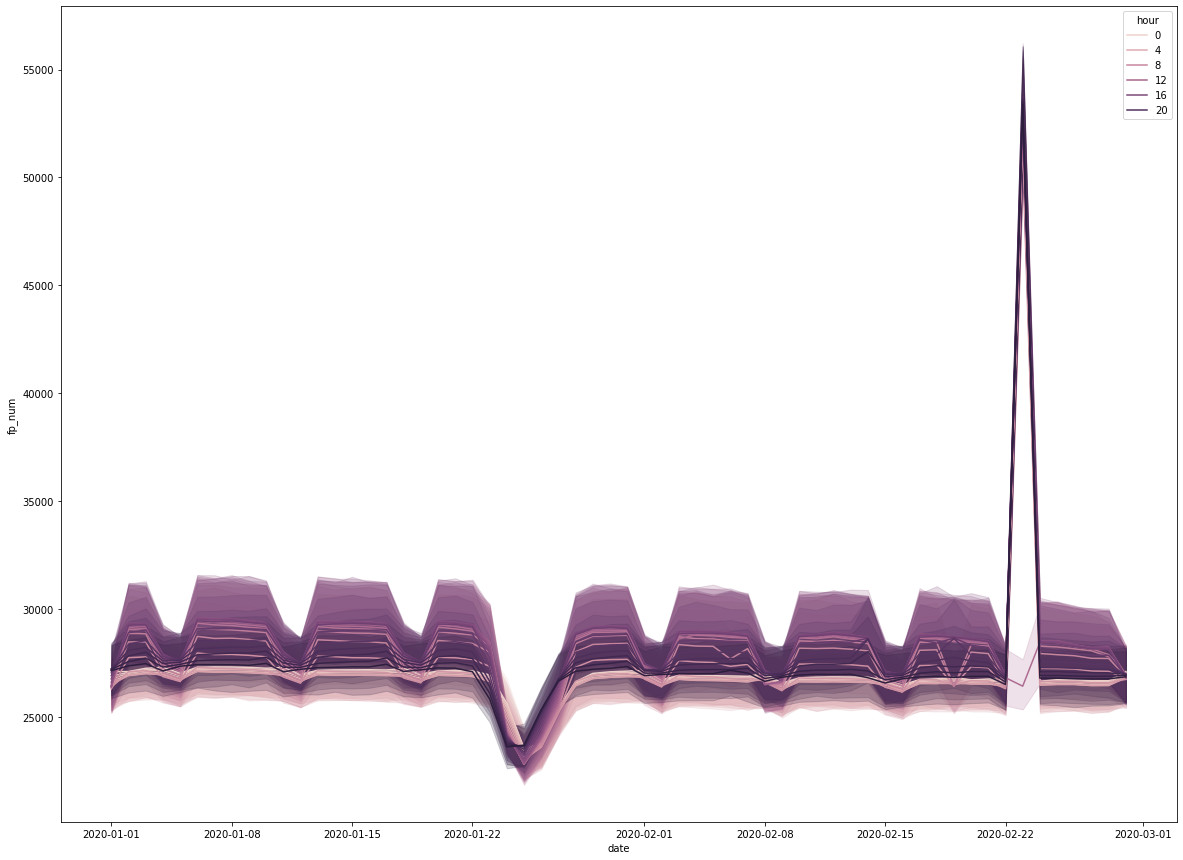

In [79]:
plt.figure(figsize=(20,15))
sns.lineplot(data=SeoulFloating, x='date', y="fp_num", hue="hour")

In [80]:
print(SeoulFloating['fp_num'].max())
SeoulFloating[SeoulFloating['fp_num']==127640]

127640


date  hour  birth_year     sex province        city  fp_num
246712 2020-02-04    14          30  female    Seoul  Gangnam-gu  127640

In [81]:
SeoulFloating[SeoulFloating['date']=='2020-02-22'].max()

date          2020-02-22 00:00:00
hour                           23
birth_year                     70
sex                          male
province                    Seoul
city                   Yongsan-gu
fp_num                      76290
dtype: object

In [82]:
print(SeoulFloating[SeoulFloating['date']>='2020-02-23']['fp_num'].max())
SeoulFloating[SeoulFloating['fp_num']==124120]

124120


date  hour  birth_year     sex province        city  fp_num
383512 2020-02-23    14          30  female    Seoul  Gangnam-gu  124120

* 그래프에서 2월22일 이후 유동인구의 최댓값으로 표시되어 있는데 실제 유동인구의 최댓값의 일자는 2월 4일인 것을 확인

In [83]:
SeoulFloating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        432000 non-null  datetime64[ns]
 1   hour        432000 non-null  int64         
 2   birth_year  432000 non-null  int64         
 3   sex         432000 non-null  object        
 4   province    432000 non-null  object        
 5   city        432000 non-null  object        
 6   fp_num      432000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 23.1+ MB


In [84]:
SeoulFloating.describe()

hour     birth_year         fp_num
count  432000.000000  432000.000000  432000.000000
mean       11.500000      45.000000   27860.034884
std         6.922195      17.078271   13122.838441
min         0.000000      20.000000    4480.000000
25%         5.750000      30.000000   18940.000000
50%        11.500000      45.000000   25690.000000
75%        17.250000      60.000000   34000.000000
max        23.000000      70.000000  127640.000000

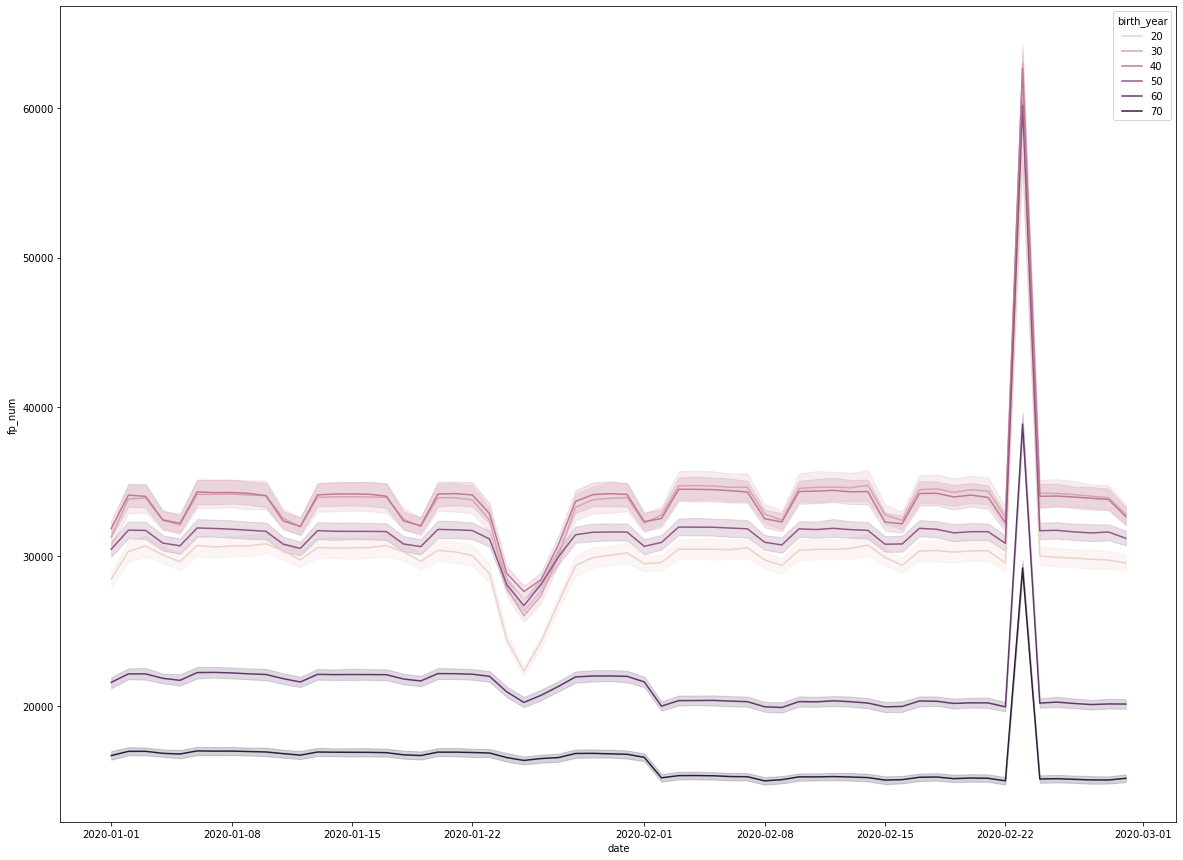

In [85]:
plt.figure(figsize=(20,15))
sns.lineplot(data=SeoulFloating, x='date', y="fp_num", hue="birth_year")

# SeoulFloating 유동인구 분석 내용
* 유동시간 그래프에서 1월 22일 이후 유동인구가 줄어드는데 이때는 설 연휴가 있어가지고 타지로 가는 인원들 때문에 유동인구가 줄어드는 모습을 볼 수 있음

* 유동인구 별 시간 그래프에서 2월 22일 이후 12~20시에 급증하는 그래프를 보여주고 있음

* 유동인구 별 시간 그래프에서 2월22일 이후 유동인구의 최댓값으로 표시되어 있는데 실제 유동인구의 최댓값의 일자는 2월 4일인 것을 확인

* 유동 연령대 그래프에서 30,40대가 20대보다 많은 유동인구를 가지고 있음

* 모든 연령대에서 20대 확진자가 가장 많은 데이터를 가지고 있는데 유동인구와 확진자는 직접적인 연관이 없음이라는 추측함

# Time 분석

In [86]:
Time

date  time    test  negative  confirmed  released  deceased
0    2020-01-20    16       1         0          1         0         0
1    2020-01-21    16       1         0          1         0         0
2    2020-01-22    16       4         3          1         0         0
3    2020-01-23    16      22        21          1         0         0
4    2020-01-24    16      27        25          2         0         0
..          ...   ...     ...       ...        ...       ...       ...
97   2020-04-26     0  598285    578558      10728      8717       242
98   2020-04-27     0  601660    582027      10738      8764       243
99   2020-04-28     0  608514    588559      10752      8854       244
100  2020-04-29     0  614197    595129      10761      8922       246
101  2020-04-30     0  619881    600482      10765      9059       247

[102 rows x 7 columns]

In [87]:
Time['date'] = pd.to_datetime(Time['date'], format = '%Y-%m-%d')

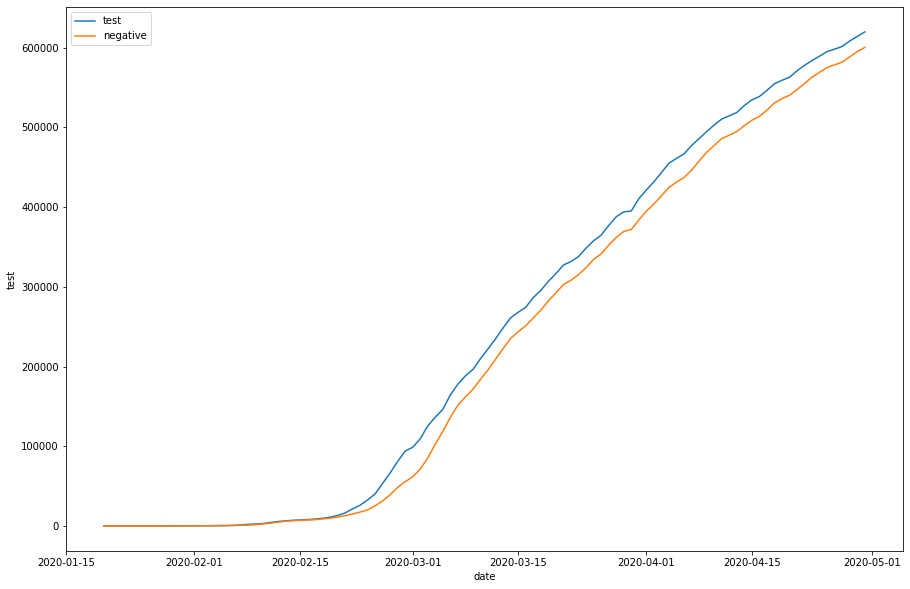

In [89]:
plt.figure(figsize=(15,10))
sns.lineplot(data=Time, x='date', y="test", label='test')
sns.lineplot(data=Time, x='date', y="negative",label='negative')
plt.legend()
plt.show()

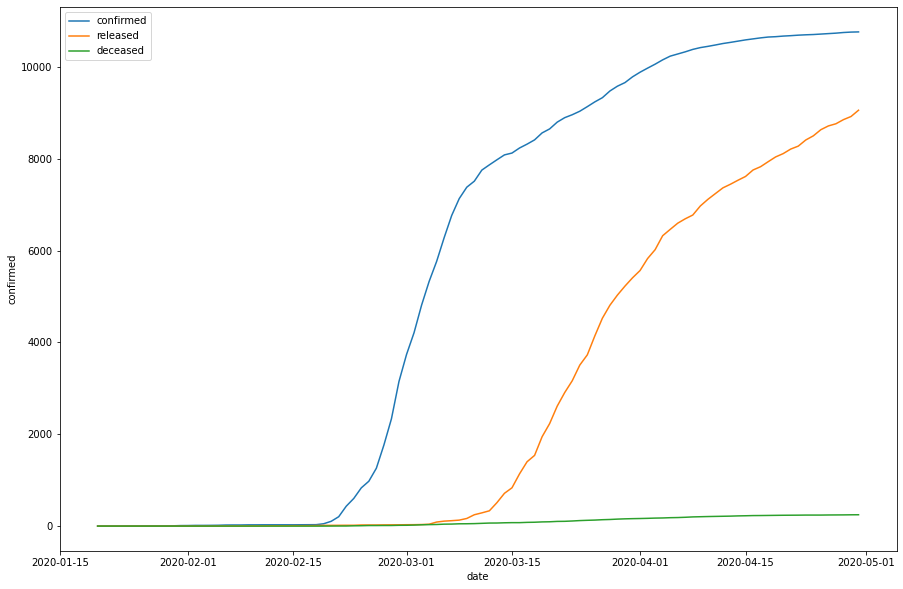

In [90]:
plt.figure(figsize=(15,10))
sns.lineplot(data=Time, x='date', y="confirmed",label='confirmed')
sns.lineplot(data=Time, x='date', y="released",label='released')
sns.lineplot(data=Time, x='date', y="deceased",label='deceased')
plt.legend()
plt.show()

# Time 분석 내용

* 코로나 초기 데이터라서 코로나 검사와 음성의 비례하는 것을 볼 수 있음

* 확진자가 발생 후 완치자가 나오는 기간차이 만큼 그래프에서 확인할 수 있음

* 출처 2의 데이터와 비교 필요

# TimeGender 분석

In [91]:
TimeGender

date  time     sex  confirmed  deceased
0    2020-03-02     0    male       1591        13
1    2020-03-02     0  female       2621         9
2    2020-03-03     0    male       1810        16
3    2020-03-03     0  female       3002        12
4    2020-03-04     0    male       1996        20
..          ...   ...     ...        ...       ...
115  2020-04-28     0  female       6408       116
116  2020-04-29     0    male       4348       129
117  2020-04-29     0  female       6413       117
118  2020-04-30     0    male       4352       130
119  2020-04-30     0  female       6413       117

[120 rows x 5 columns]

In [92]:
TimeGender['date'] = pd.to_datetime(TimeGender['date'], format = '%Y-%m-%d')

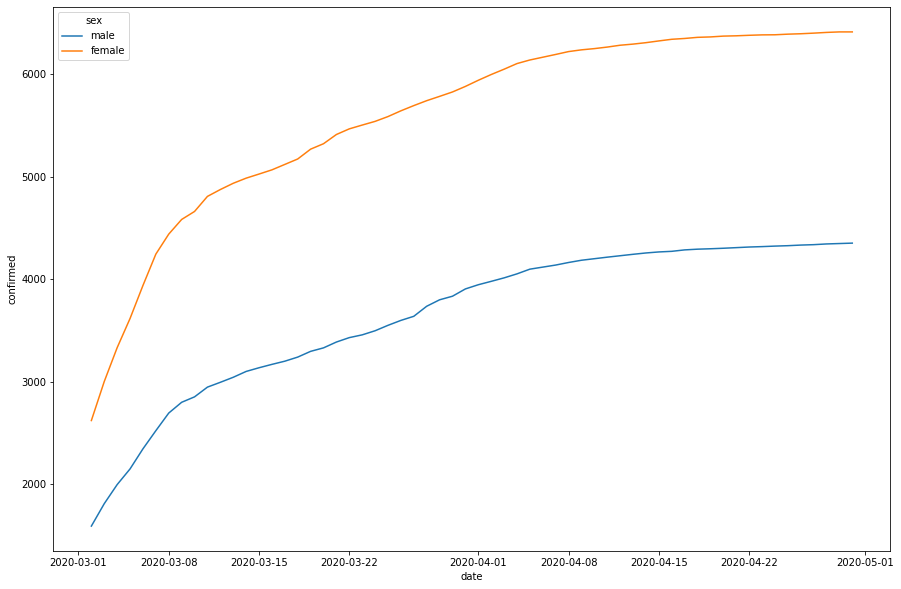

In [93]:
plt.figure(figsize=(15,10))
sns.lineplot(data=TimeGender, x='date', y='confirmed',hue='sex')

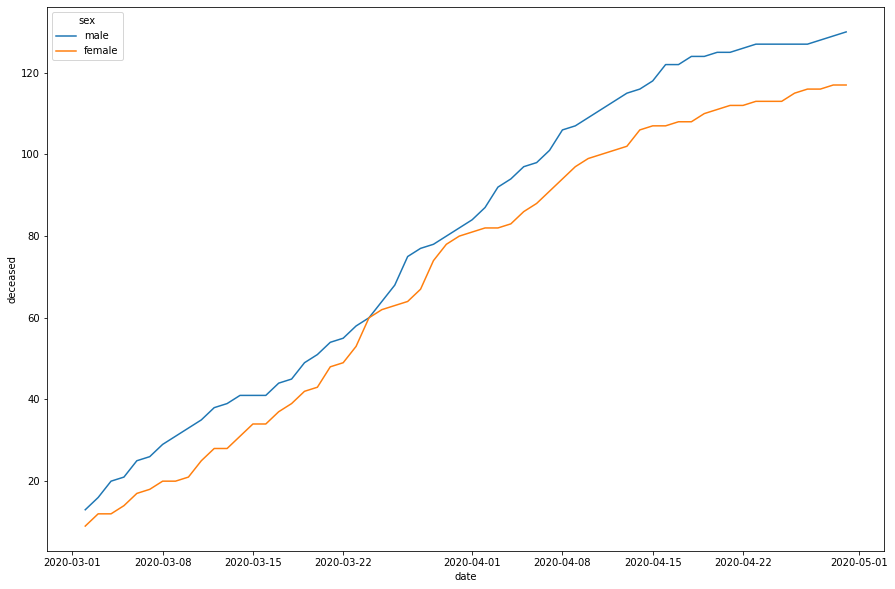

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(data=TimeGender, x='date', y='deceased',hue='sex')

# TimeGender 분석 내용

* 확진자는 여성이 더 많지만 사망자는 남성이 더 많음

# TimeProvince 분석

In [95]:
TimeProvince

date  time          province  confirmed  released  deceased
0     2020-01-20    16             Seoul          0         0         0
1     2020-01-20    16             Busan          0         0         0
2     2020-01-20    16             Daegu          0         0         0
3     2020-01-20    16           Incheon          1         0         0
4     2020-01-20    16           Gwangju          0         0         0
...          ...   ...               ...        ...       ...       ...
1729  2020-04-30     0      Jeollabuk-do         18        11         0
1730  2020-04-30     0      Jeollanam-do         15        11         0
1731  2020-04-30     0  Gyeongsangbuk-do       1365      1147        52
1732  2020-04-30     0  Gyeongsangnam-do        117        97         0
1733  2020-04-30     0           Jeju-do         13         8         0

[1734 rows x 6 columns]

In [96]:
TimeProvince['date'] = pd.to_datetime(TimeProvince['date'], format = '%Y-%m-%d')

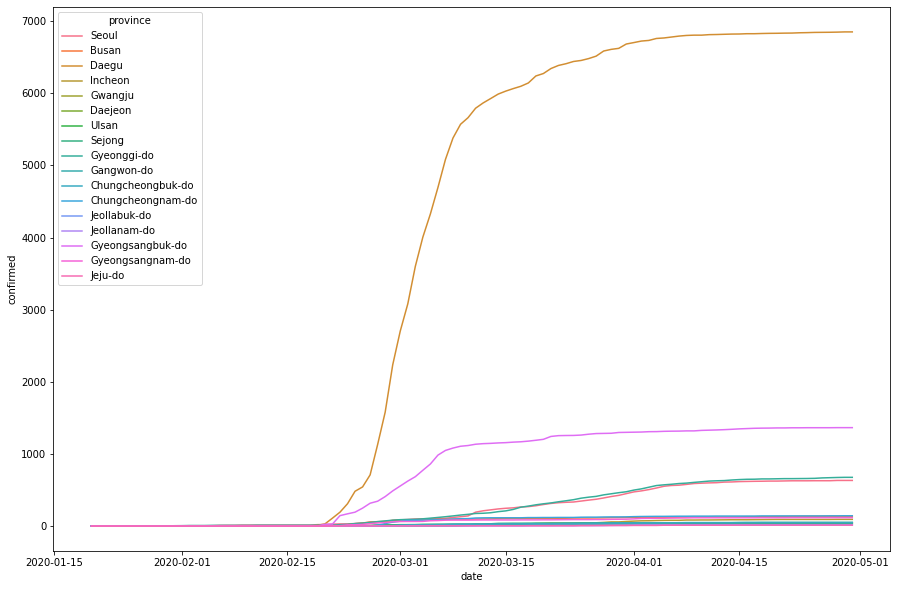

In [97]:
plt.figure(figsize=(15,10))
sns.lineplot(data=TimeProvince, x='date', y='confirmed',hue='province')

In [98]:
timepro = TimeProvince.groupby(['province']).sum()
timepro

time  confirmed  released  deceased
province                                              
Busan               672       7465      4500       116
Chungcheongbuk-do   672       2292      1230         0
Chungcheongnam-do   672       7671      4251         0
Daegu               672     387801    202604      6389
Daejeon             672       1907       892         0
Gangwon-do          672       2410      1136        67
Gwangju             672       1432       821         0
Gyeonggi-do         672      27308     11957       436
Gyeongsangbuk-do    672      77101     39169      2113
Gyeongsangnam-do    672       6276      3361         0
Incheon             672       3558      1526         0
Jeju-do             672        523       220         0
Jeollabuk-do        672        819       406         0
Jeollanam-do        672        622       246         0
Sejong              672       2230       803         0
Seoul               672      26166      9489        46
Ulsan               672       2227      1204        30

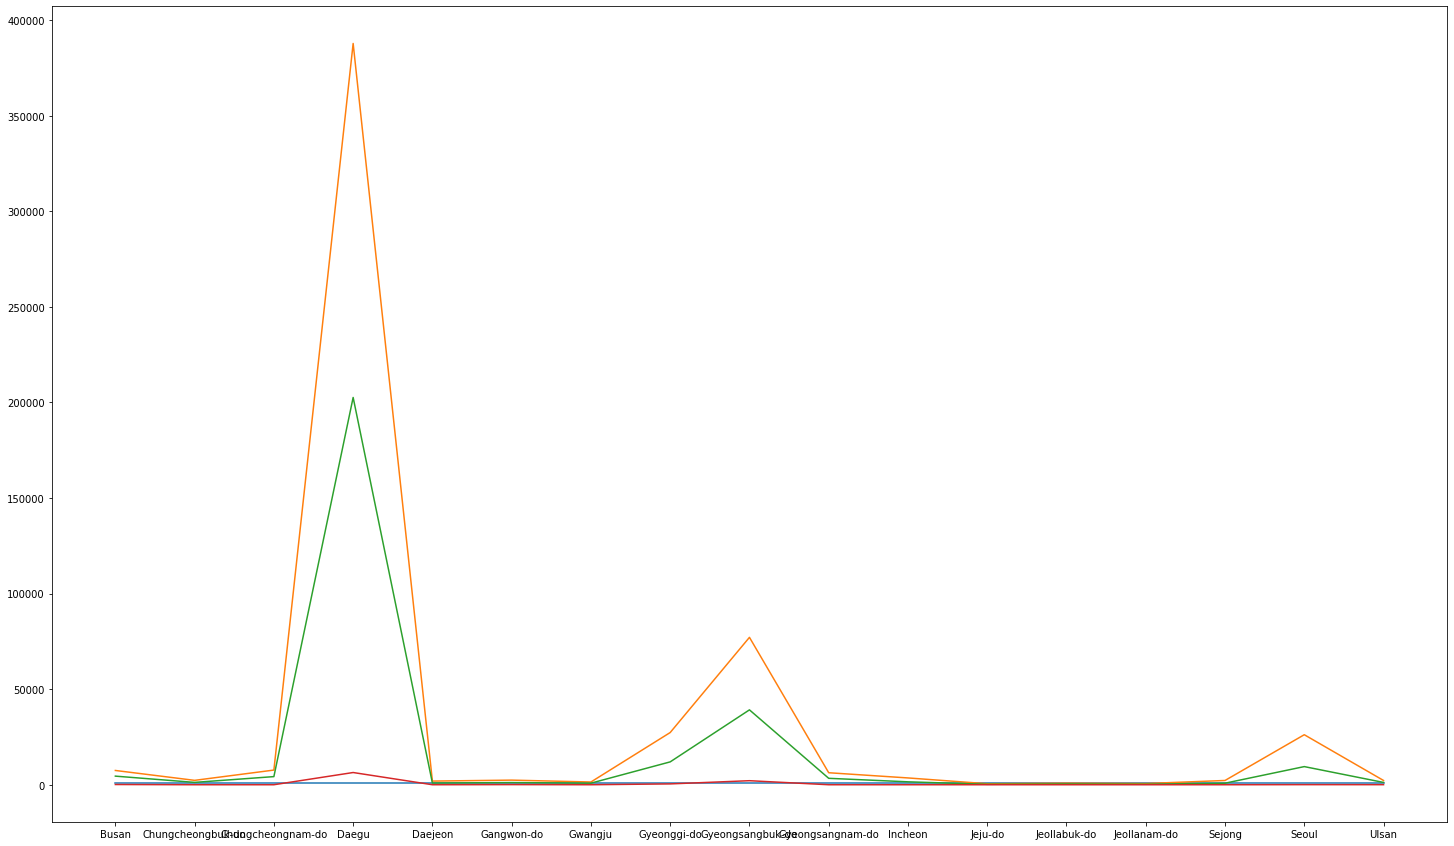

In [99]:
plt.figure(figsize=(25,15))
plt.plot(timepro)

# TimeProvince 분석 내용

* 대구, 경상북도, 서울 3 지역이 확진자와 완치자가 가장 많은 지역

* 대구와 경상북도는 신천지의 영향이 크기 때문에 코로나 초기 확진자수에 영향이 크다고 볼수 있음

* 서울은 전국에서 인구가 가장 많은 밀집지역과 구로콜센터와 같은 집단감염에 의해서 초기 확진자 수에 영향이 클수 있다고 생각함

# SearchTrend 분석

In [100]:
SearchTrend

date     cold      flu  pneumonia  coronavirus
0     2016-01-01  0.11663  0.05590    0.15726      0.00736
1     2016-01-02  0.13372  0.17135    0.20826      0.00890
2     2016-01-03  0.14917  0.22317    0.19326      0.00845
3     2016-01-04  0.17463  0.18626    0.29008      0.01145
4     2016-01-05  0.17226  0.15072    0.24562      0.01381
...          ...      ...      ...        ...          ...
1576  2020-04-25  0.12781  0.02709    0.08672      4.13405
1577  2020-04-26  0.13363  0.03263    0.08136      3.95342
1578  2020-04-27  0.11226  0.04427    0.10390      4.11033
1579  2020-04-28  0.11481  0.03981    0.10336      3.73088
1580  2020-04-29  0.10781  0.04163    0.09136      3.78952

[1581 rows x 5 columns]

In [101]:
SearchTrend['date'] = pd.to_datetime(SearchTrend['date'], format = '%Y-%m-%d')

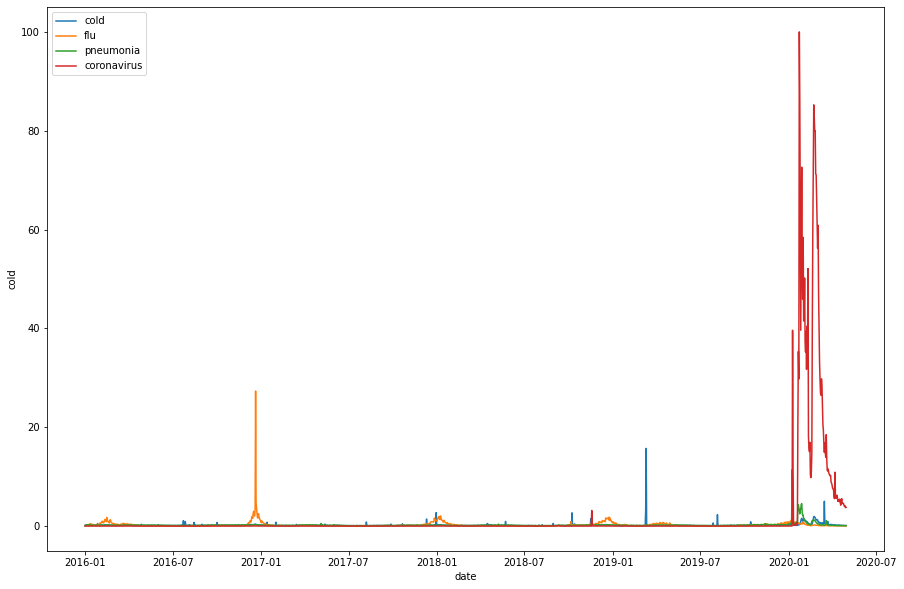

In [102]:
plt.figure(figsize=(15,10))
sns.lineplot(data=SearchTrend, x='date', y="cold", label='cold')
sns.lineplot(data=SearchTrend, x='date', y="flu", label='flu')
sns.lineplot(data=SearchTrend, x='date', y="pneumonia", label='pneumonia')
sns.lineplot(data=SearchTrend, x='date', y="coronavirus", label='coronavirus')
plt.legend()
plt.show()

In [103]:
trend = SearchTrend.groupby('coronavirus').sum()
trend

cold      flu  pneumonia
coronavirus                             
0.00154      0.19362  0.08853    0.18126
0.00172      0.06999  0.01845    0.07690
0.00199      0.11190  0.04881    0.09345
0.00218      0.06072  0.01572    0.07945
0.00227      0.05836  0.02290    0.08036
...              ...      ...        ...
79.95441     1.67058  0.20181    1.02206
82.90014     1.94203  0.19326    1.15841
85.23907     1.91594  0.19472    1.27032
86.11541     0.34689  0.40226    2.48156
100.00000    0.30308  0.55625    3.18035

[356 rows x 3 columns]

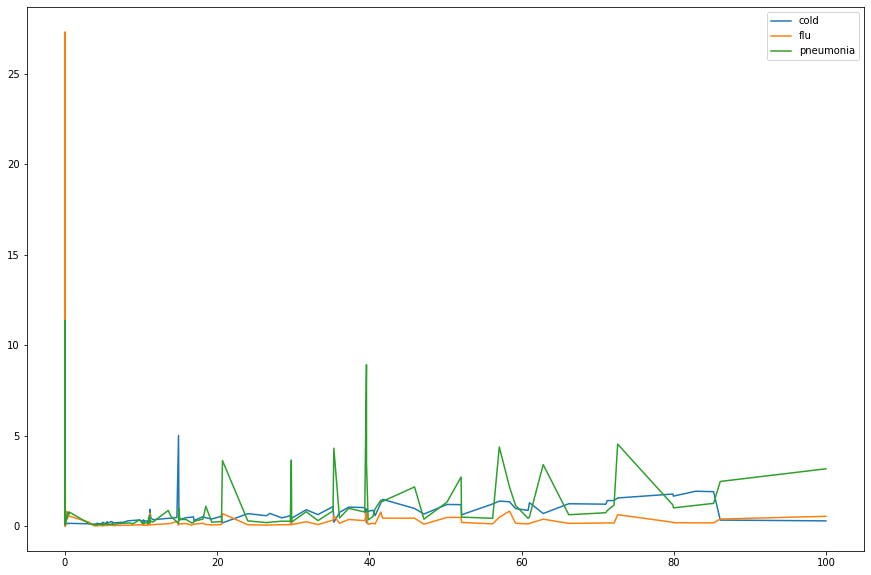

In [104]:
plt.figure(figsize=(15,10))
plt.plot(trend['cold'],label='cold')
plt.plot(trend['flu'],label='flu')
plt.plot(trend['pneumonia'],label='pneumonia')
plt.legend()
plt.show()

#SearchTrend 분석 내용

* 코로나는 호흡기 질병이고 후유증으로 폐렴이 있기 때문에 폐렴의 검색량이 3 호흡기 질병중 가장 많은 검색량을 가지고 있는 것을 확인 할 수 있음


# 출처 2의 데이터는 전 세계 코로나 환자 데이터라서 한국 데이터만 추출

In [105]:
kor_df = covid[covid['location']=='South Korea']
kor_df

iso_code continent     location        date  total_cases  new_cases  \
156083      KOR      Asia  South Korea  2020-01-22          1.0        NaN   
156084      KOR      Asia  South Korea  2020-01-23          1.0        0.0   
156085      KOR      Asia  South Korea  2020-01-24          2.0        1.0   
156086      KOR      Asia  South Korea  2020-01-25          2.0        0.0   
156087      KOR      Asia  South Korea  2020-01-26          3.0        1.0   
...         ...       ...          ...         ...          ...        ...   
156923      KOR      Asia  South Korea  2022-05-11   17694677.0    35883.0   
156924      KOR      Asia  South Korea  2022-05-12   17727086.0    32409.0   
156925      KOR      Asia  South Korea  2022-05-13   17756627.0    29541.0   
156926      KOR      Asia  South Korea  2022-05-14   17782061.0    25434.0   
156927      KOR      Asia  South Korea  2022-05-15          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
156083                 NaN           NaN         NaN                  NaN   
156084                 NaN           NaN         NaN                  NaN   
156085                 NaN           NaN         NaN                  NaN   
156086                 NaN           NaN         NaN                  NaN   
156087                 NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
156923           36658.429       23554.0        63.0               56.571   
156924           37472.000       23606.0        52.0               57.143   
156925           36041.857       23661.0        55.0               53.143   
156926           33951.857       23709.0        48.0               49.857   
156927                 NaN           NaN         NaN                  NaN   

        ...  female_smokers  male_smokers  handwashing_facilities  \
156083  ...             6.2          40.9                     NaN   
156084  ...             6.2          40.9                     NaN   
156085  ...             6.2          40.9                     NaN   
156086  ...             6.2          40.9                     NaN   
156087  ...             6.2          40.9                     NaN   
...     ...             ...           ...                     ...   
156923  ...             6.2          40.9                     NaN   
156924  ...             6.2          40.9                     NaN   
156925  ...             6.2          40.9                     NaN   
156926  ...             6.2          40.9                     NaN   
156927  ...             6.2          40.9                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
156083                       12.27            83.03                    0.916   
156084                       12.27            83.03                    0.916   
156085                       12.27            83.03                    0.916   
156086                       12.27            83.03                    0.916   
156087                       12.27            83.03                    0.916   
...                            ...              ...                      ...   
156923                       12.27            83.03                    0.916   
156924                       12.27            83.03                    0.916   
156925                       12.27            83.03                    0.916   
156926                       12.27            83.03                    0.916   
156927                       12.27            83.03                    0.916   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
156083                                   NaN                          NaN   
156084                                   NaN                          NaN   
156085                                   NaN                          NaN   
156086                                   NaN   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87ccb155d0>,
      dtype=object)

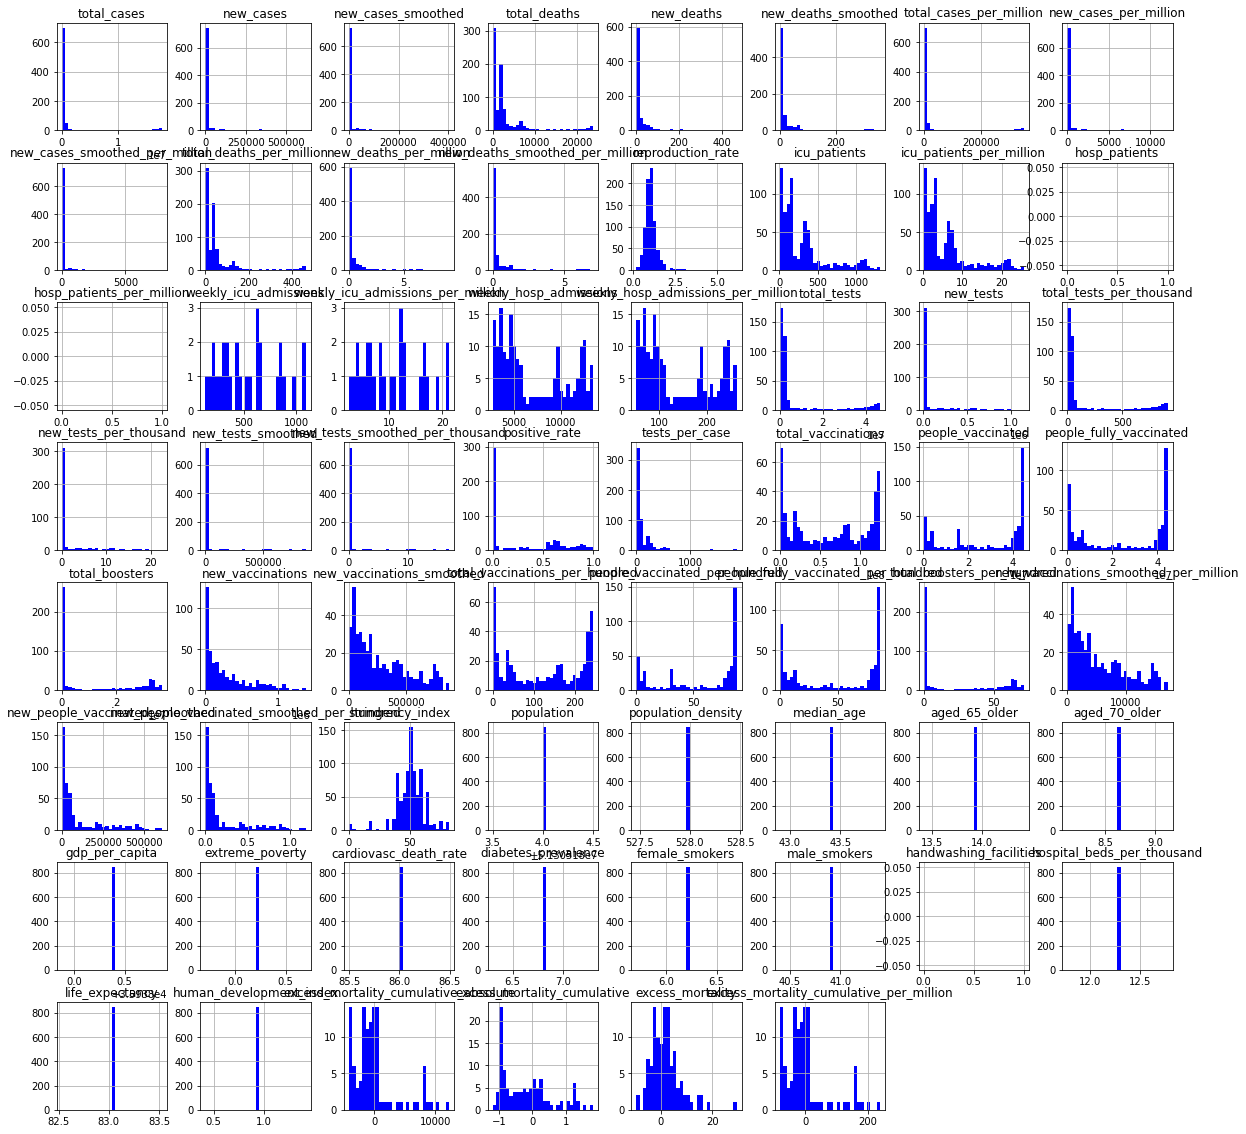

In [106]:
kor_df.hist(bins=30, figsize=(20,20), color='b')

* Histogram을 통해 삭제해도 되는 컬럼 분류

In [107]:
cols = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'icu_patients', 'total_tests','new_tests','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
        'total_boosters', 'new_vaccinations']
kor = kor_df[cols]

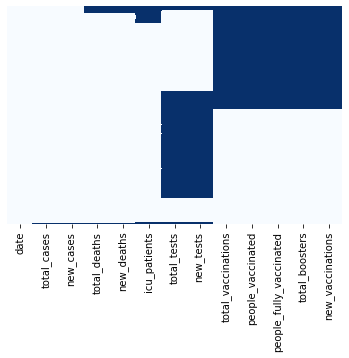

In [108]:
# NaN값인 컬럼 시각화
sns.heatmap(kor.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [109]:
kor = kor.fillna(0)
kor

date  total_cases  new_cases  total_deaths  new_deaths  \
156083  2020-01-22          1.0        0.0           0.0         0.0   
156084  2020-01-23          1.0        0.0           0.0         0.0   
156085  2020-01-24          2.0        1.0           0.0         0.0   
156086  2020-01-25          2.0        0.0           0.0         0.0   
156087  2020-01-26          3.0        1.0           0.0         0.0   
...            ...          ...        ...           ...         ...   
156923  2022-05-11   17694677.0    35883.0       23554.0        63.0   
156924  2022-05-12   17727086.0    32409.0       23606.0        52.0   
156925  2022-05-13   17756627.0    29541.0       23661.0        55.0   
156926  2022-05-14   17782061.0    25434.0       23709.0        48.0   
156927  2022-05-15          0.0        0.0           0.0         0.0   

        icu_patients  total_tests  new_tests  total_vaccinations  \
156083           0.0          0.0        0.0                 0.0   
156084           0.0          0.0        0.0                 0.0   
156085           0.0          0.0        0.0                 0.0   
156086           0.0          0.0        0.0                 0.0   
156087           0.0          0.0        0.0                 0.0   
...              ...          ...        ...                 ...   
156923           0.0   46684375.0   158366.0         124478764.0   
156924           0.0          0.0        0.0         124583298.0   
156925           0.0          0.0        0.0         124746652.0   
156926           0.0          0.0        0.0         124783300.0   
156927           0.0          0.0        0.0         124783787.0   

        people_vaccinated  people_fully_vaccinated  total_boosters  \
156083                0.0                      0.0             0.0   
156084                0.0                      0.0             0.0   
156085                0.0                      0.0             0.0   
156086                0.0                      0.0             0.0   
156087                0.0                      0.0             0.0   
...                   ...                      ...             ...   
156923         45041195.0               44559167.0      36394648.0   
156924         45041901.0               44560095.0      36497550.0   
156925         45043384.0               44562056.0      36657464.0   
156926         45044088.0               44562791.0      36692674.0   
156927         45044097.0               44562798.0      36693145.0   

        new_vaccinations  
156083               0.0  
156084               0.0  
156085               0.0  
156086               0.0  
156087               0.0  
...                  ...  
156923          107161.0  
156924          104534.0  
156925          163354.0  
156926           36648.0  
156927             487.0  

[845 rows x 13 columns]

* 2020-01-20일에 최초 확진자가 발생하여 전체 확진자가 1일때 새로운 확진자가 없으므로 NaN으로 표시되어있기 때문에 NaN값은 당일에 추가 된 확진자가 없다고 생각하여 0으로 변경

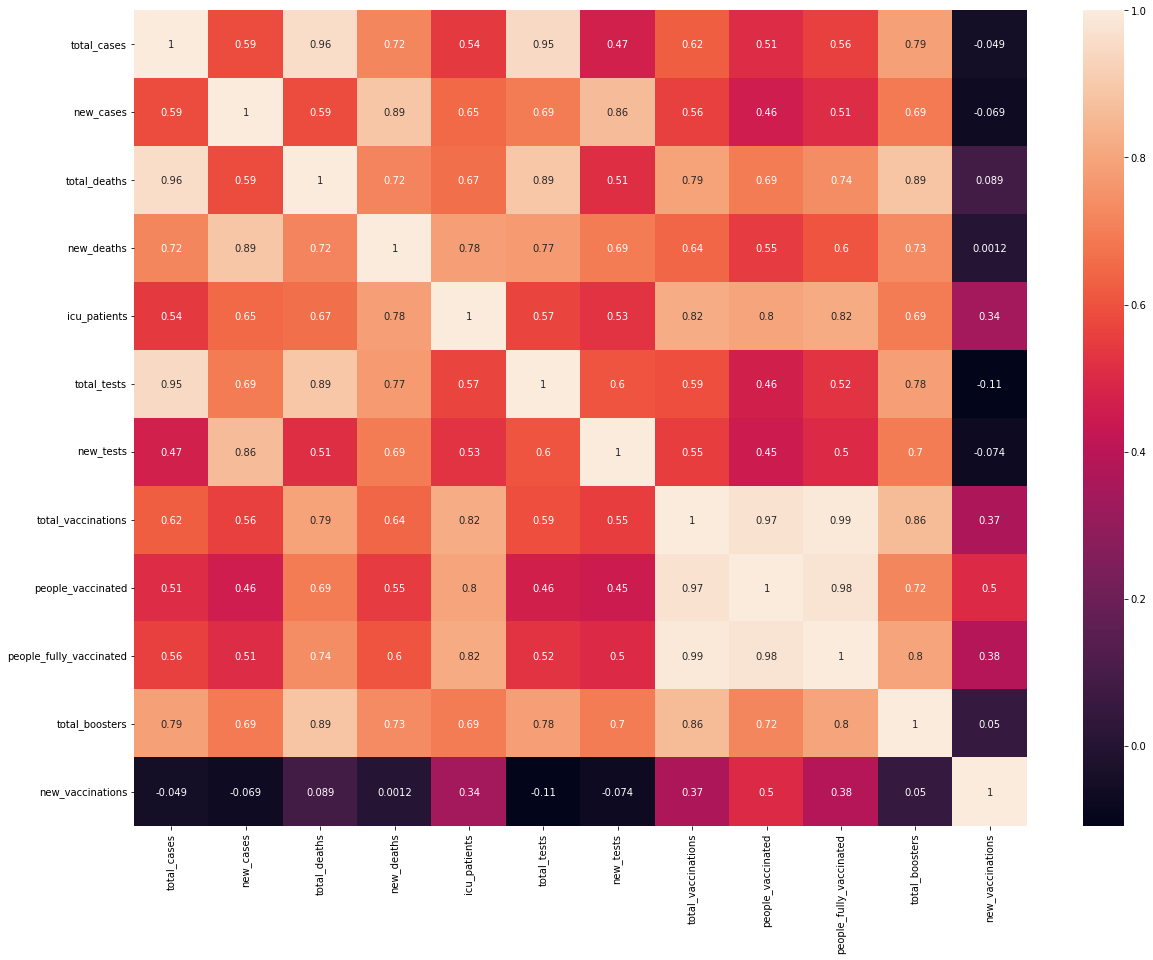

In [110]:
corr = kor.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

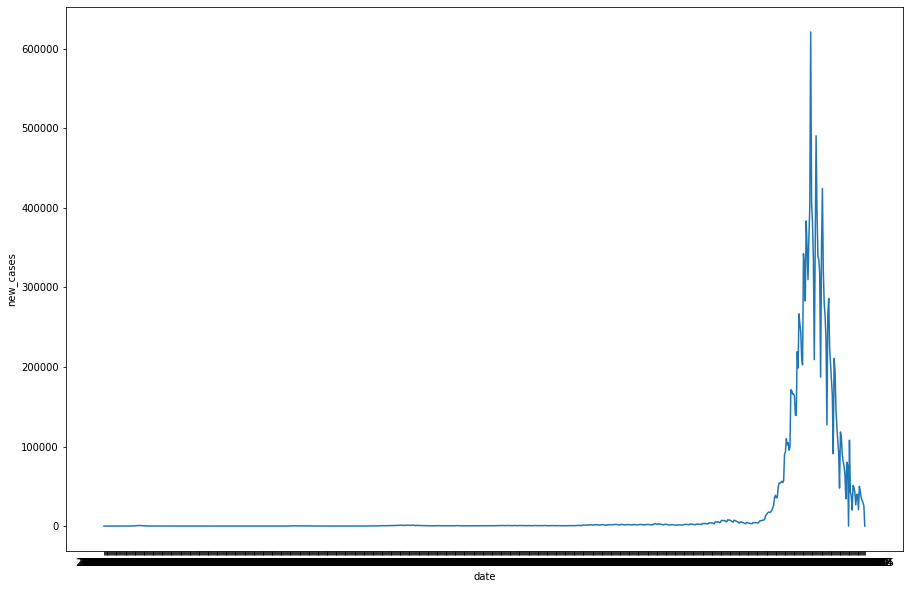

In [111]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor, x='date', y="new_cases")

* 22년도 확진자와 20,21년도 확진자의 수보다 훨씬 많아져서 그래프로 비교하기 어려워서 년도를 나눠서 비교

In [112]:
kor_2020 = kor[kor['date'].str.contains('2020')]
kor_2021 = kor[kor['date'].str.contains('2021')]
kor_2022 = kor[kor['date'].str.contains('2022')]

In [113]:
kor_2020['date'] = pd.to_datetime(kor_2020['date'])
kor_2021['date'] = pd.to_datetime(kor_2021['date'])
kor_2022['date'] = pd.to_datetime(kor_2022['date'])

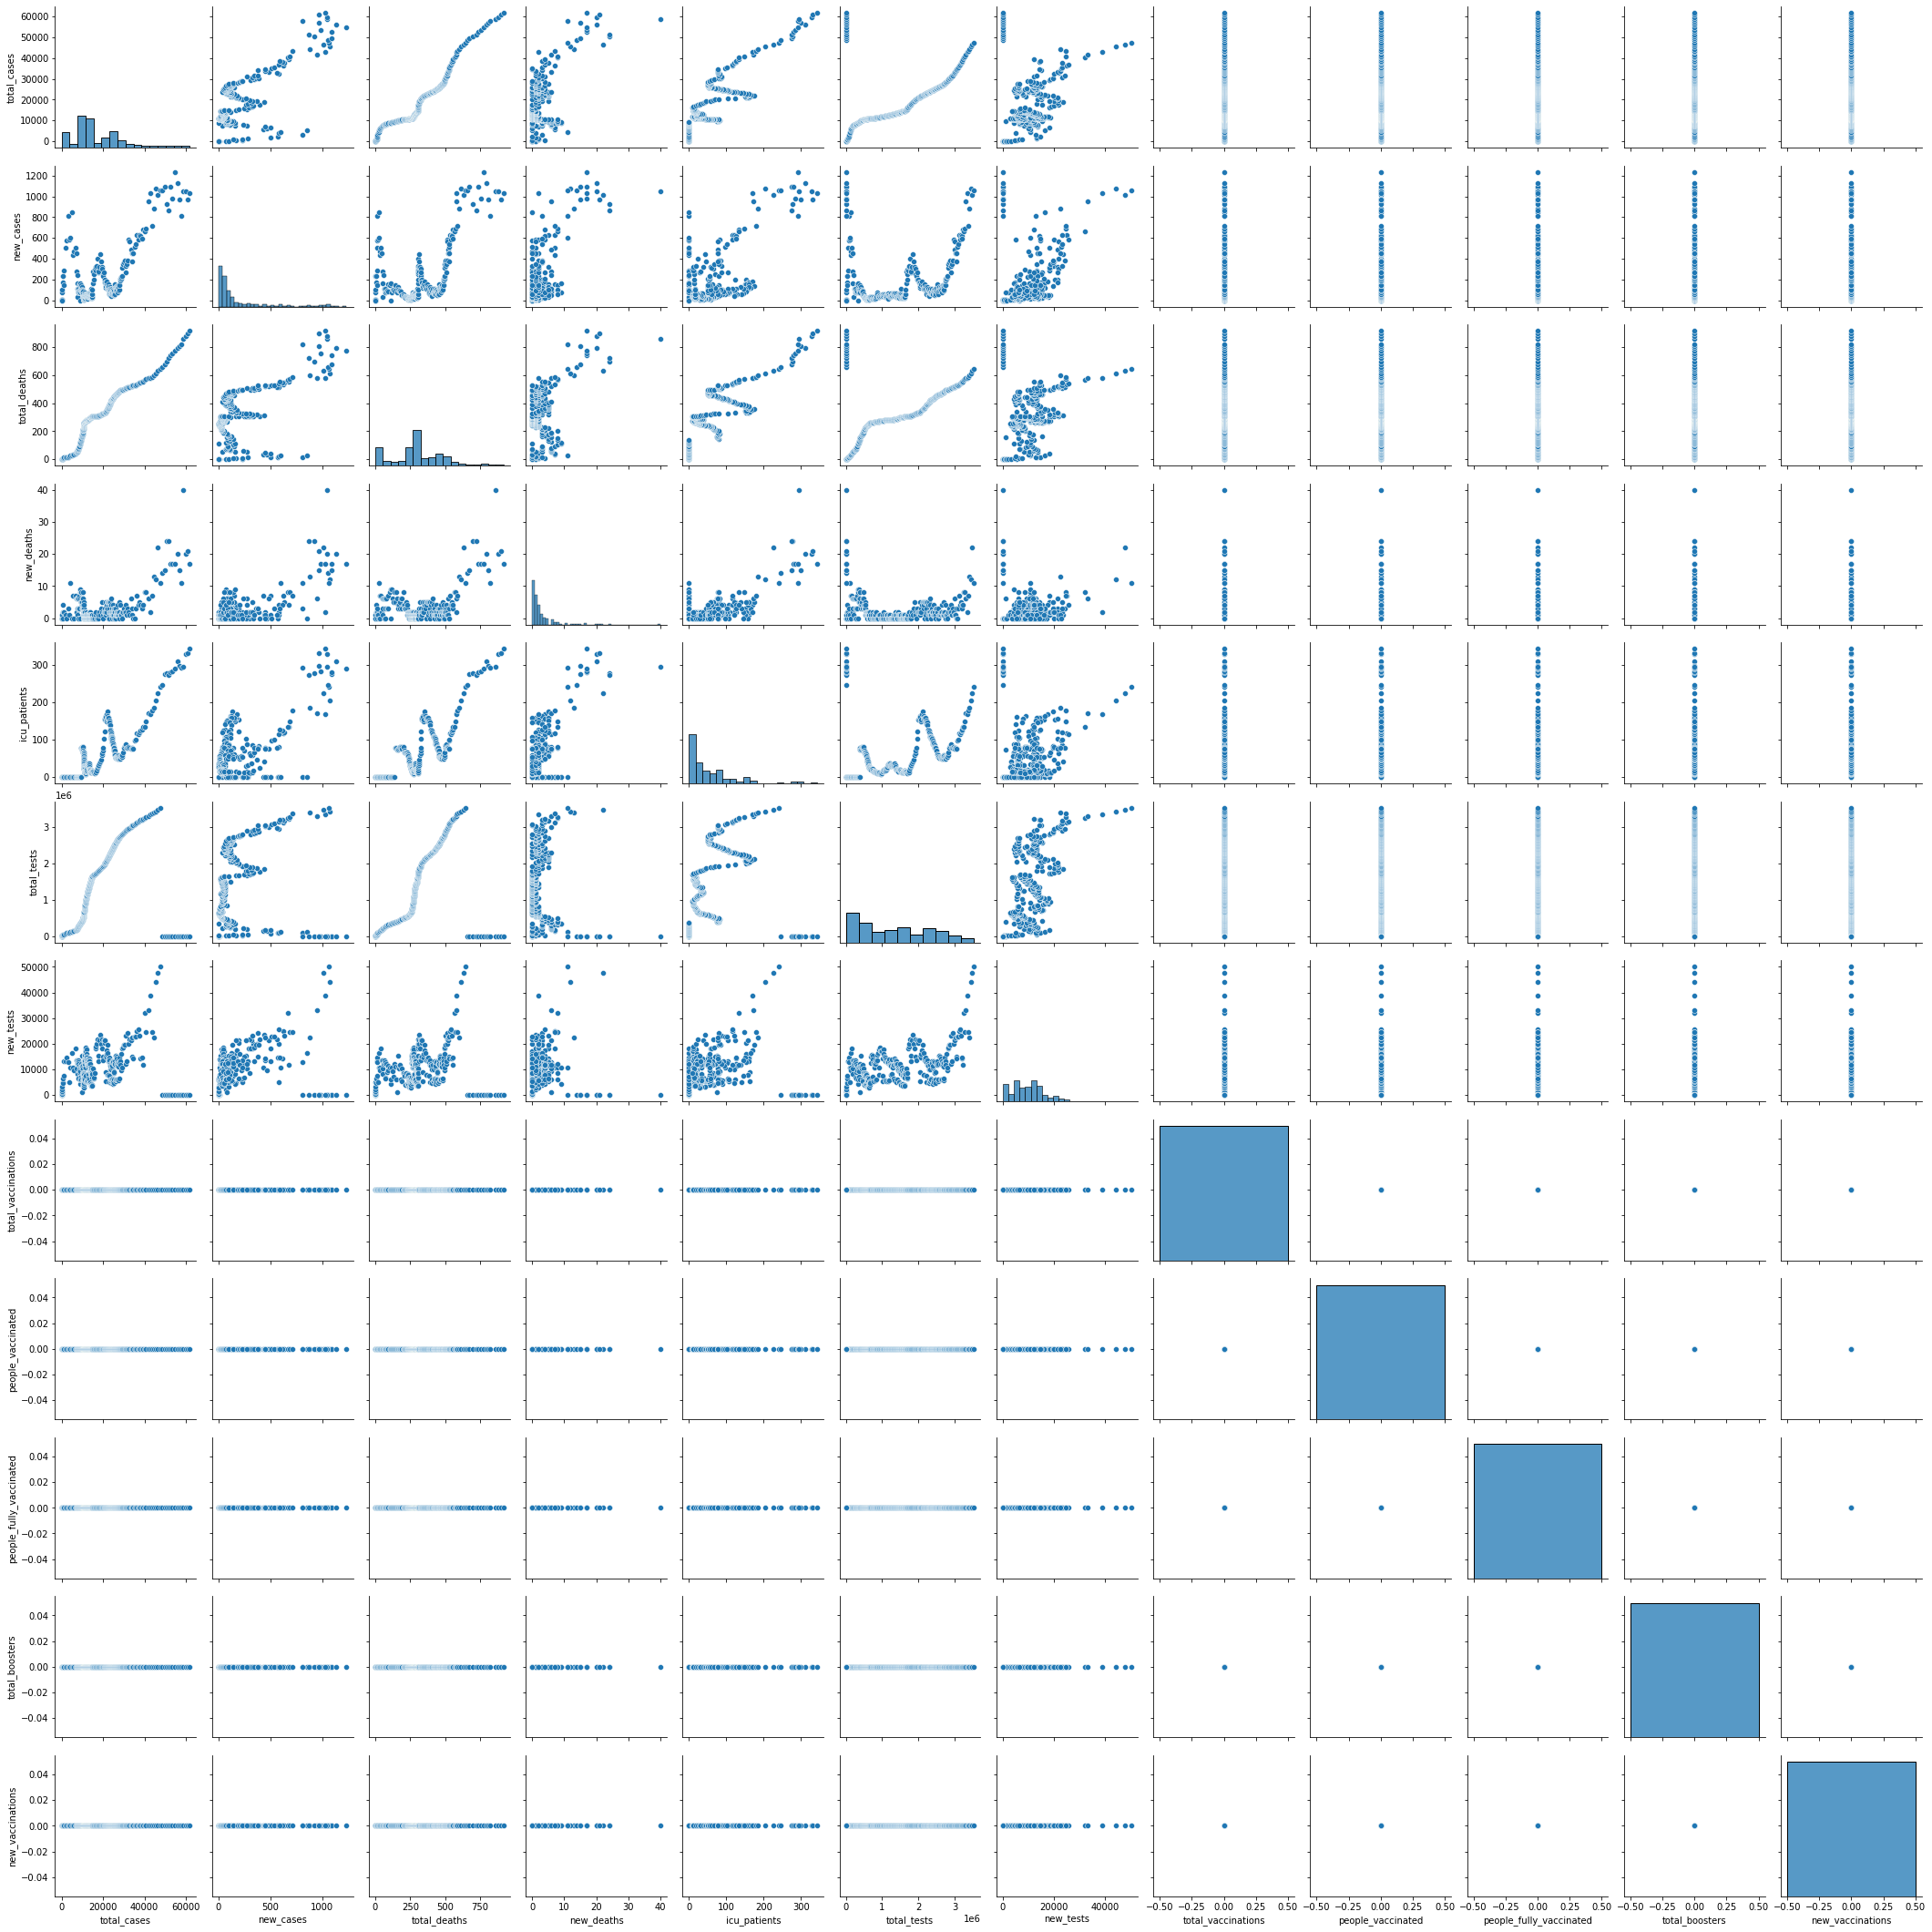

In [114]:
sns.pairplot(kor_2020)

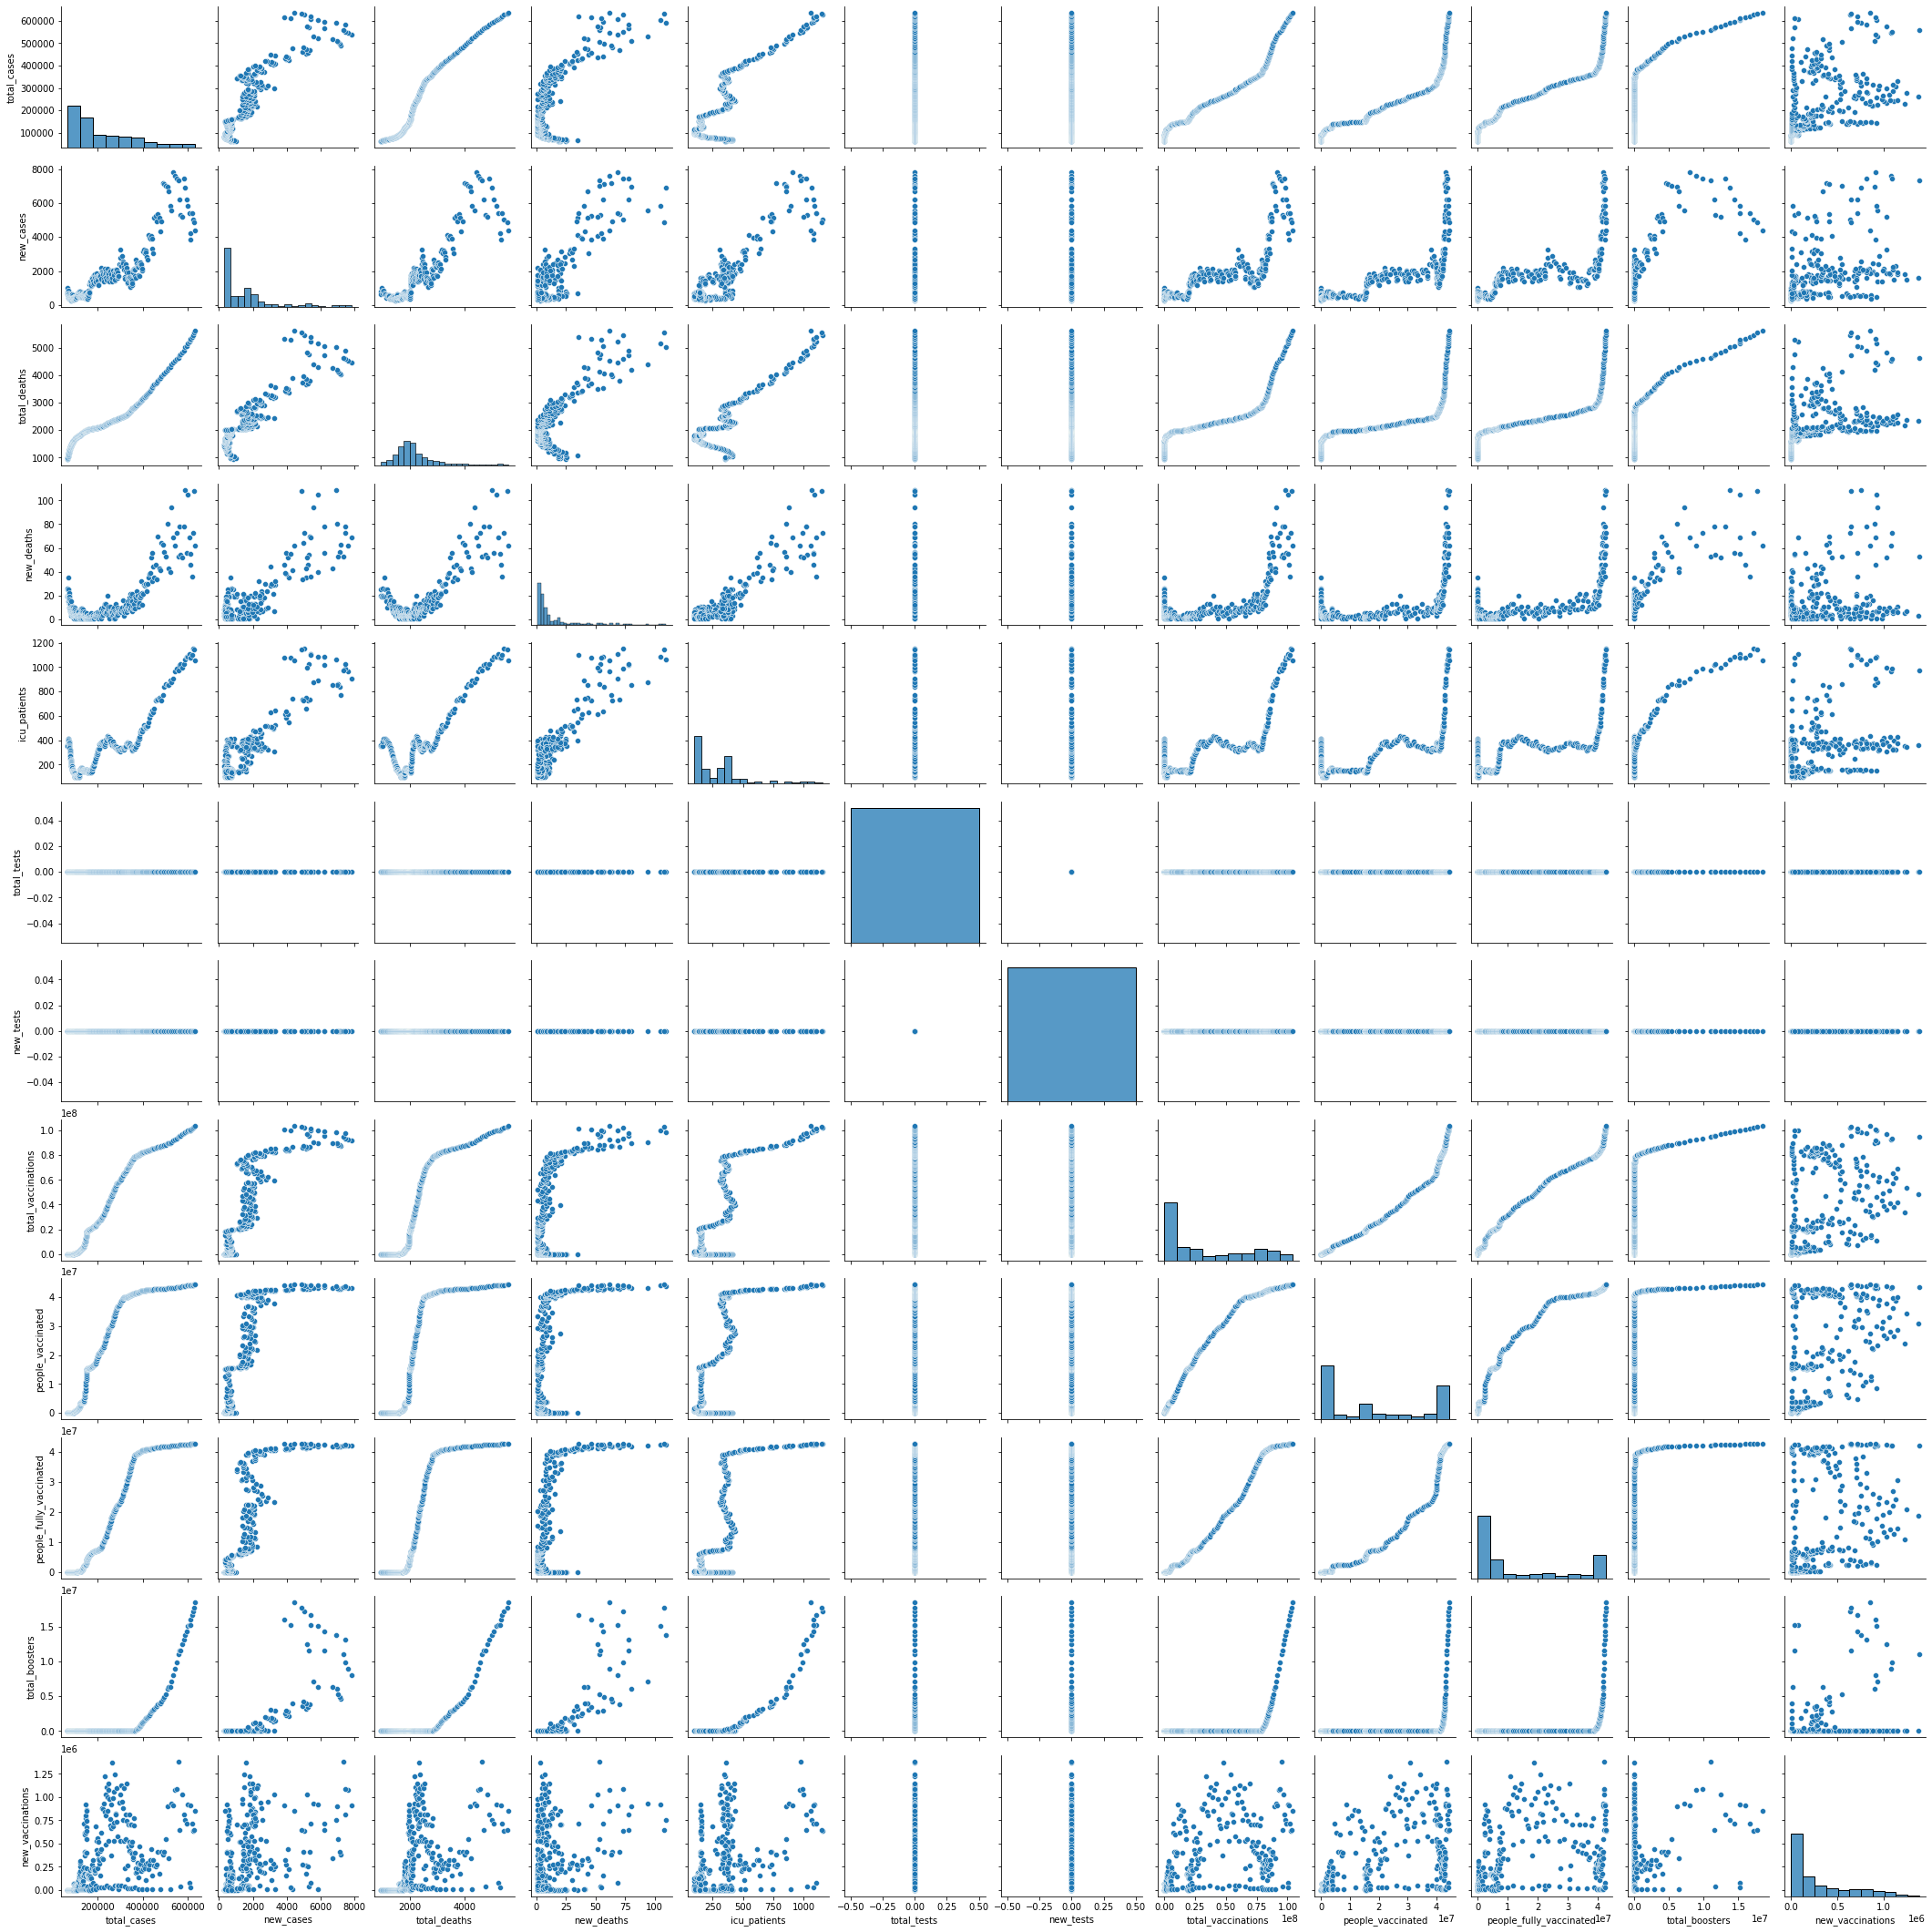

In [115]:
sns.pairplot(kor_2021)

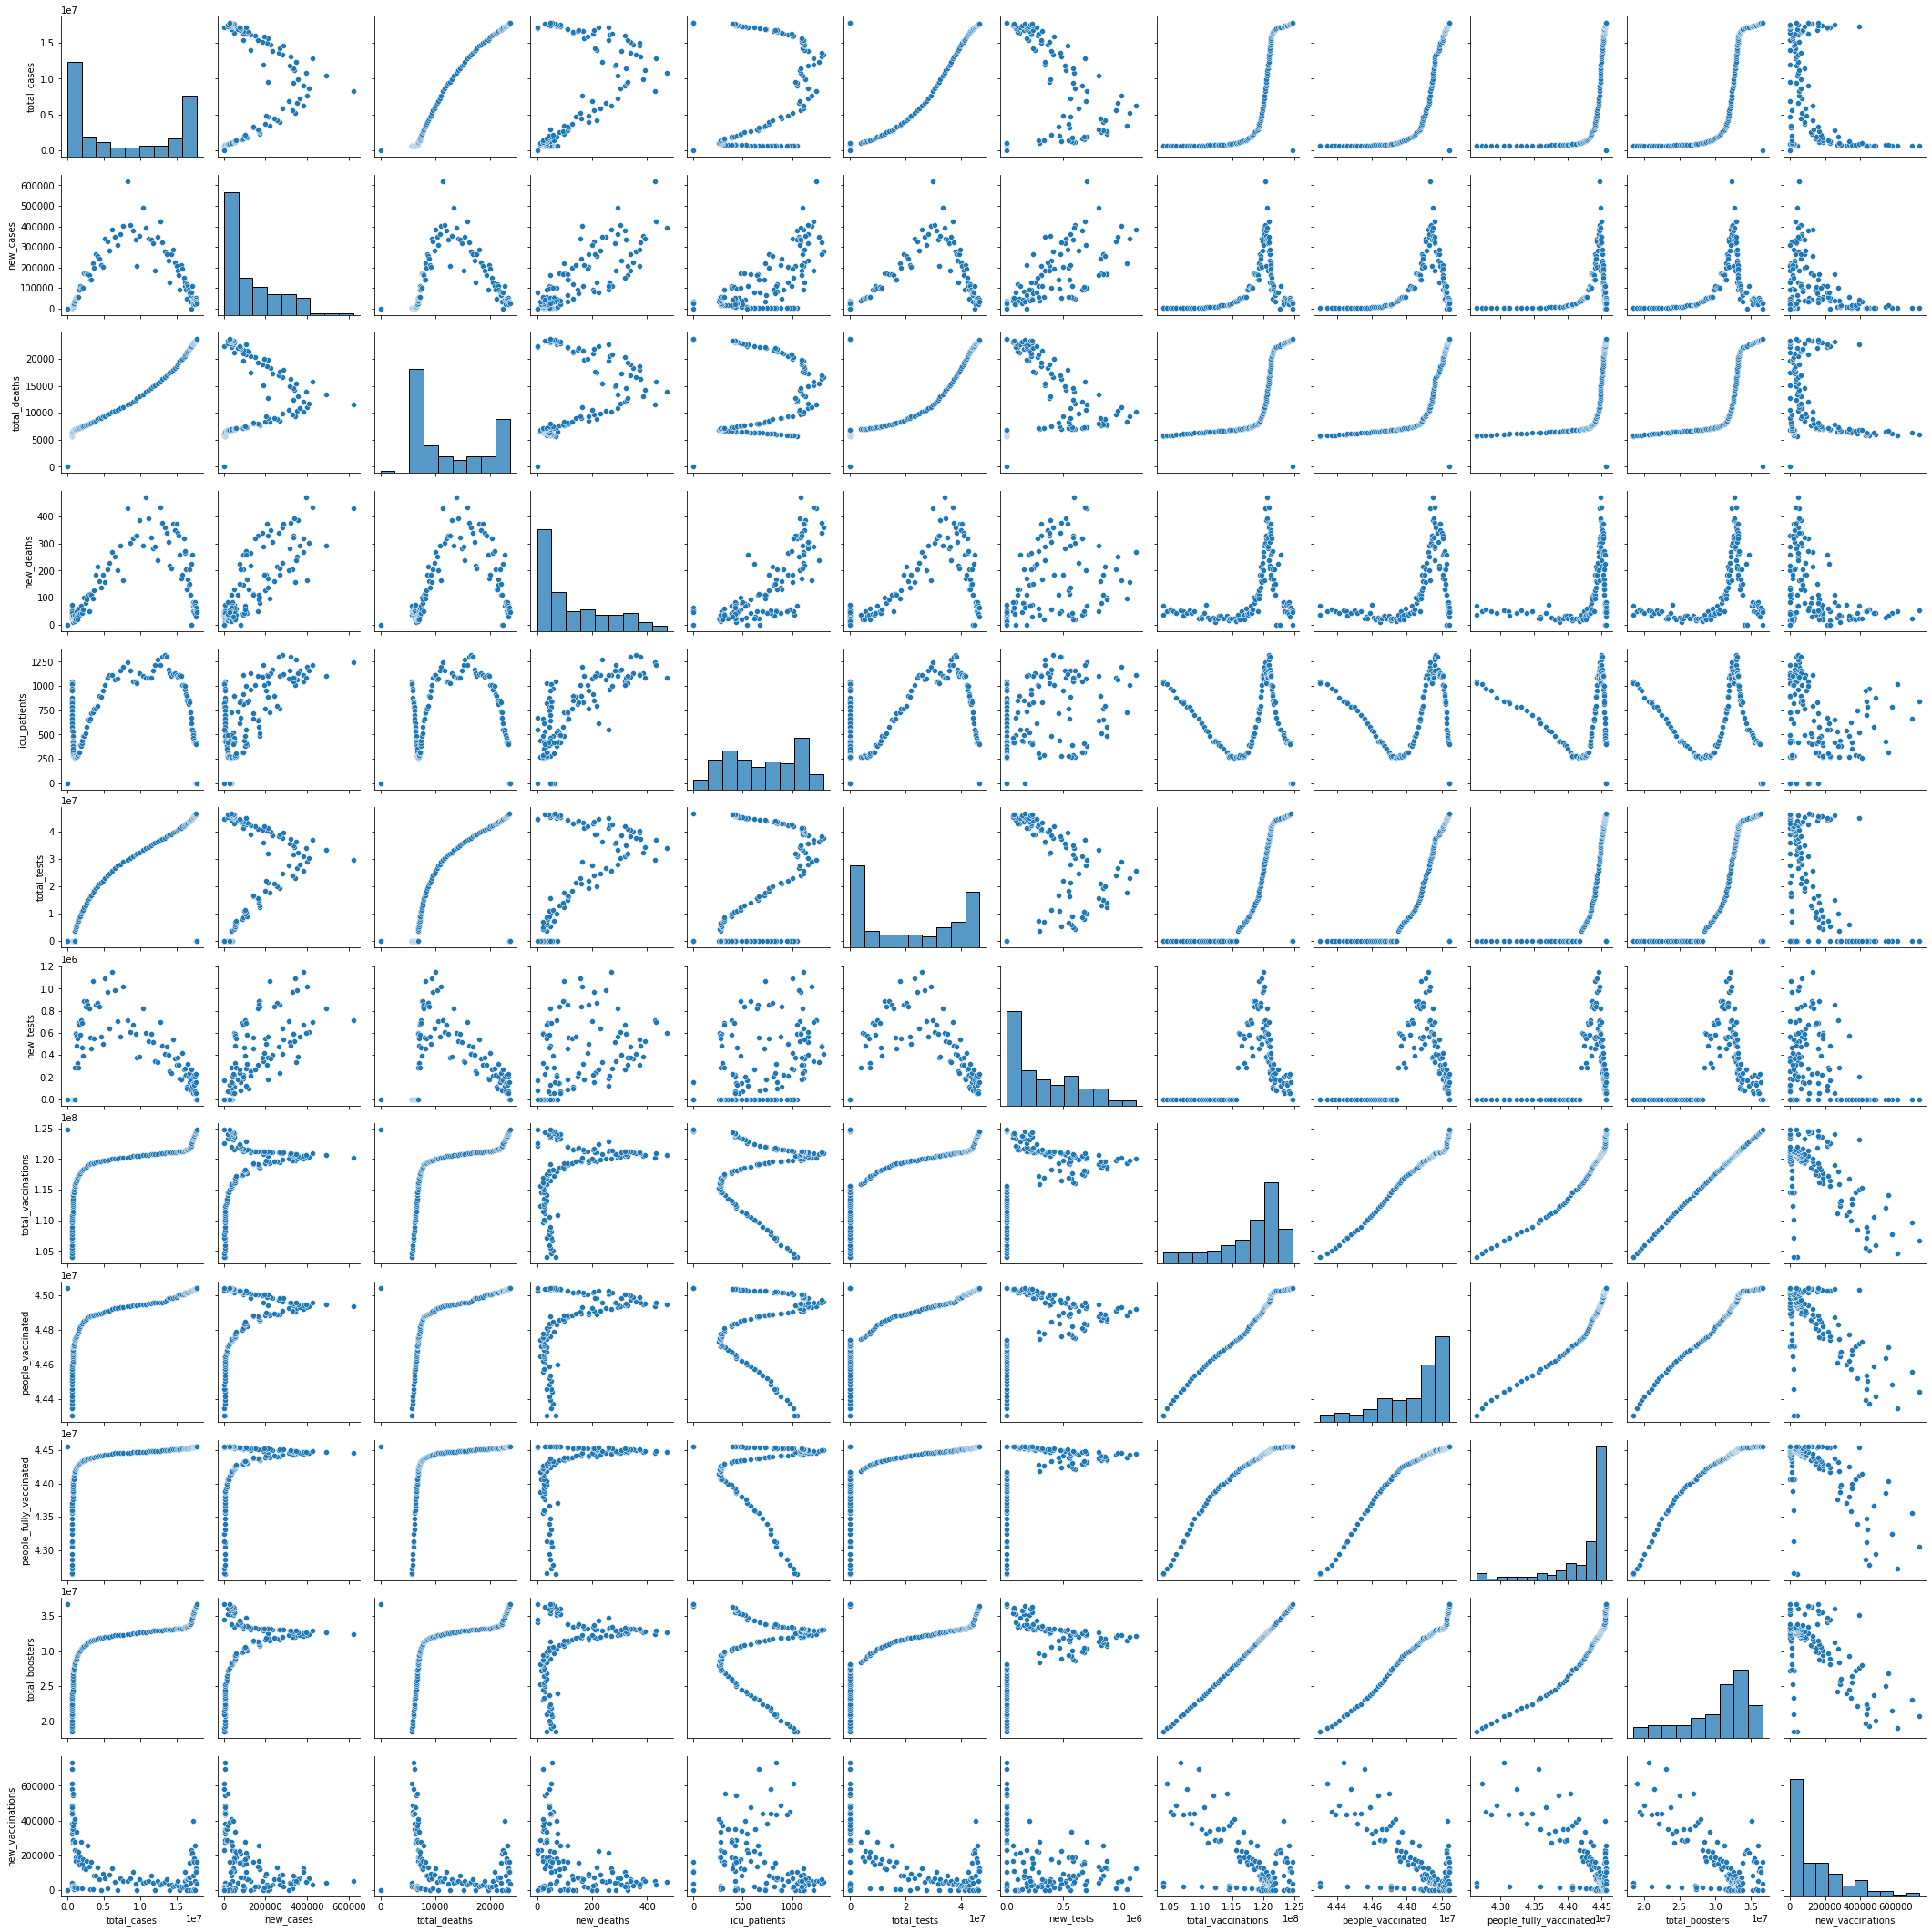

In [116]:
sns.pairplot(kor_2022)

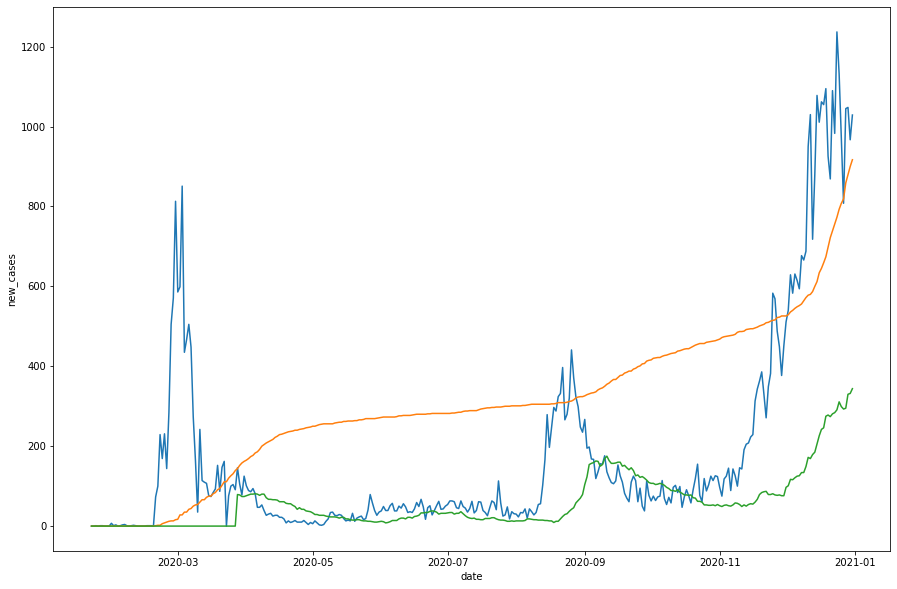

In [117]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2020, x='date', y="new_cases")
sns.lineplot(data=kor_2020, x='date', y="total_deaths")
sns.lineplot(data=kor_2020, x='date', y="icu_patients")

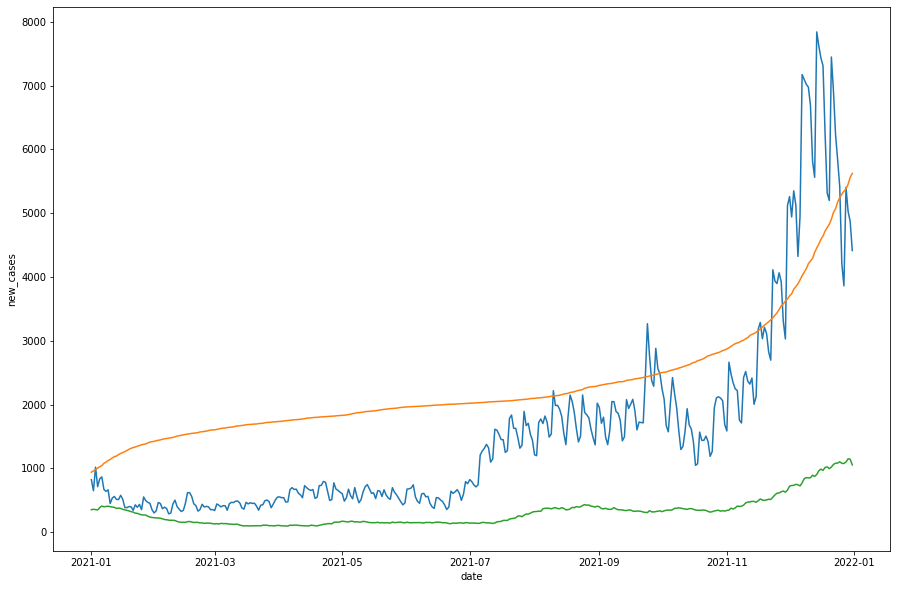

In [118]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2021, x='date', y="new_cases")
sns.lineplot(data=kor_2021, x='date', y="total_deaths")
sns.lineplot(data=kor_2021, x='date', y="icu_patients")

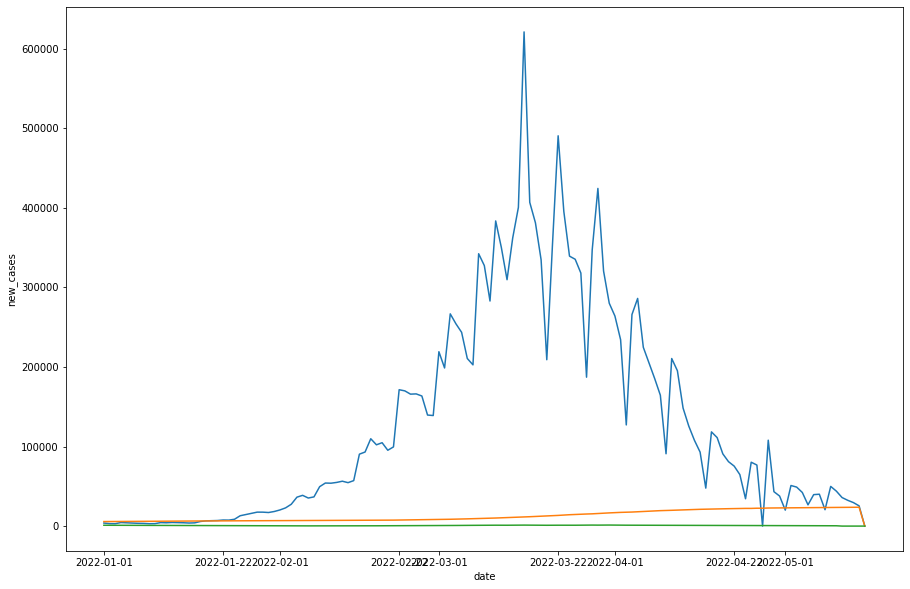

In [119]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2022, x='date', y="new_cases")
sns.lineplot(data=kor_2022, x='date', y="total_deaths")
sns.lineplot(data=kor_2022, x='date', y="icu_patients")

* 20, 21, 22년으로 나눠서 그래프 비교
* 파란선 new_cases / 주황색 total_death / 초록색 icu_paitent
* 20년 3월, 9월 12월 확진자의 급 증가하는 그래프를 볼 수 있는데 그 기간이 코로나 대 유행 1,2,3차 시기로 판단
* 확진자는 꾸준히 증가함
* 전체 사망자도 꾸준히 증가함
* icu환자의 그래프는 확진자의 그래프와 유사한 모습을 볼 수 있고 확진자 중 증상이 심해진 확진자가 icu환자이기 때문에 증가하는 기간이 확진자의 그래프보다 조금씩 밀리는 그래프로 형성
* 20, 21년도 그래프에서 가을과 겨울에 확진자 상승하는 결과를 확인

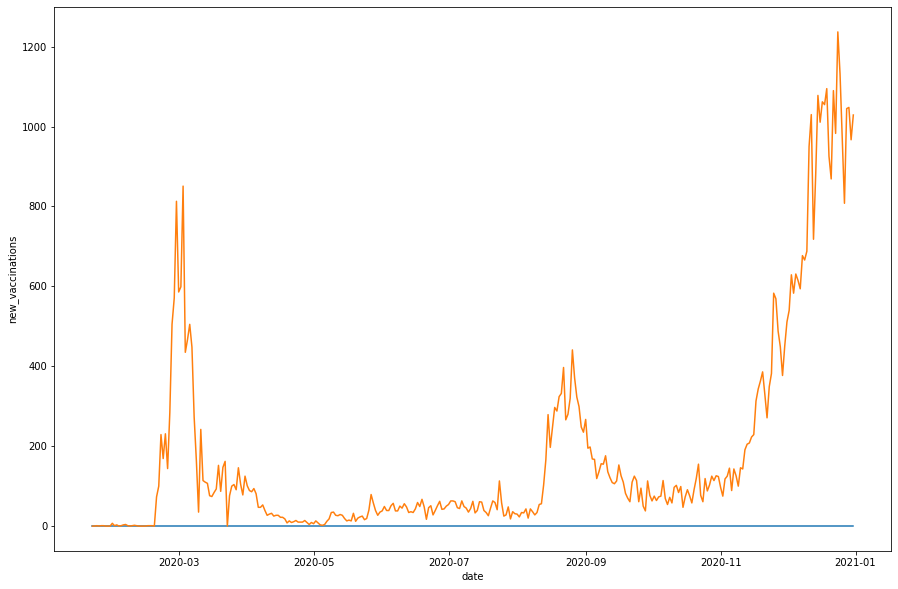

In [120]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2020, x='date', y="new_vaccinations")
sns.lineplot(data=kor_2020, x='date', y="new_cases")

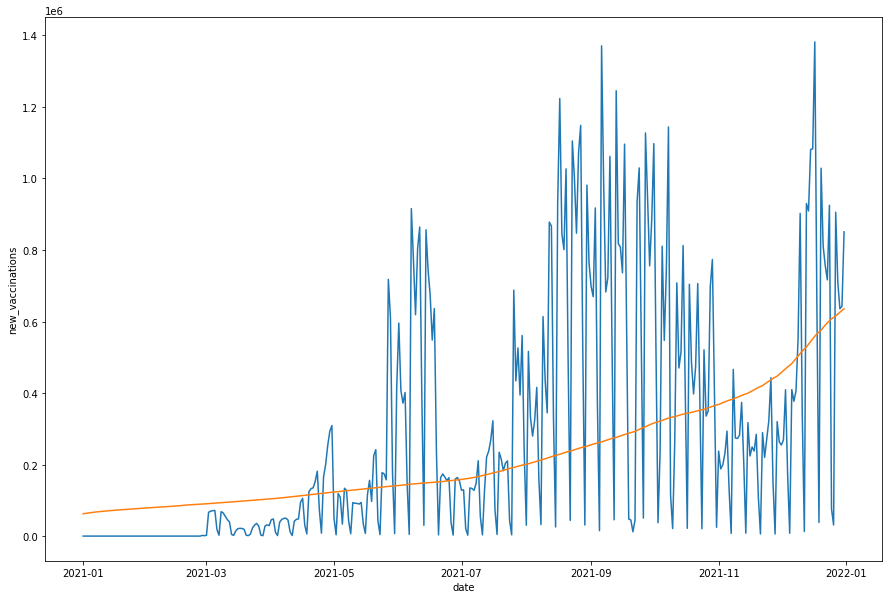

In [121]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2021, x='date', y="new_vaccinations")
sns.lineplot(data=kor_2021, x='date', y="total_cases")

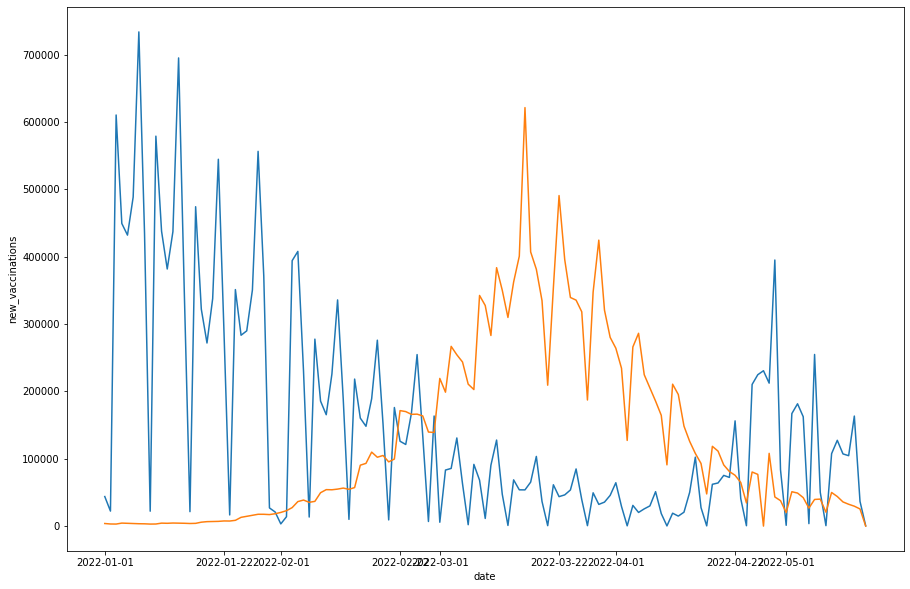

In [122]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kor_2022, x='date', y="new_vaccinations")
sns.lineplot(data=kor_2022, x='date', y="new_cases")

* 백신 접종이 21년부터 시작했고 21년도 그래프에서 전체 확진자수가 증가할 수록 백신 접종자도 증가함

* 22년 백신접종자수가 줄어들수록 확진자수가 증가하는 그래프를 확인

# 출처2 데이터 분석 내용

* 2020-01-20일에 최초 확진자가 발생하여 전체 확진자가 1일때 새로운 확진자가 없으므로 NaN으로 표시되어있기 때문에 NaN값은 당일에 추가 된 확진자가 없다고 생각하여 0으로 변경

* 20, 21, 22년으로 나눠서 그래프 비교
* 파란선 new_cases / 주황색 total_death / 초록색 icu_paitent
* 20년 3월, 9월 12월 확진자의 급 증가하는 그래프를 볼 수 있는데 그 기간이 코로나 대 유행 1,2,3차 시기로 판단
* 확진자는 꾸준히 증가함
* 전체 사망자도 꾸준히 증가함
* icu환자의 그래프는 확진자의 그래프와 유사한 모습을 볼 수 있고 확진자 중 증상이 심해진 확진자가 icu환자이기 때문에 증가하는 기간이 확진자의 그래프보다 조금씩 밀리는 그래프로 형성
* 20, 21년도 그래프에서 가을과 겨울에 확진자 상승하는 결과를 확인
* 백신 접종이 21년부터 시작했고 21년도 그래프에서 전체 확진자수가 증가할 수록 백신 접종자도 증가함

* 22년 백신접종자수가 줄어들수록 확진자수가 증가하는 그래프를 확인

No handles with labels found to put in legend.


<Figure size 1440x1080 with 0 Axes>

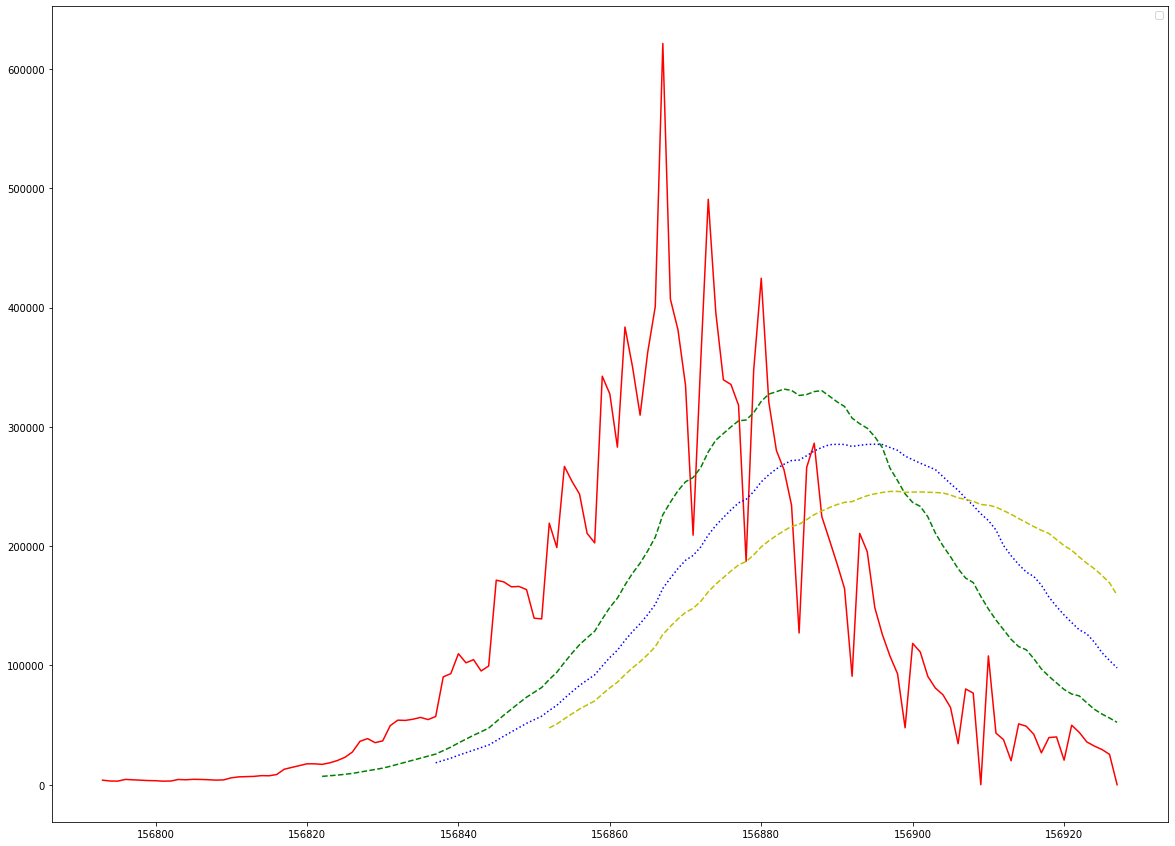

In [123]:
plt.figure(figsize=(20,15))
plt.figure(figsize=(20,15))
plt.plot(kor_2022['new_cases'],'r')
after_30 = kor_2022['new_cases'].rolling(window=30).mean()
after_45 = kor_2022['new_cases'].rolling(window=45).mean()
after_60 = kor_2022['new_cases'].rolling(window=60).mean()
plt.plot(after_30, 'g--')
plt.plot(after_45, 'b:')
plt.plot(after_60, 'y--')
plt.legend()
plt.show()